Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 0.Scope

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. Acknowledgements

# 1. Loading required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix, classification_report,precision_recall_curve, recall_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.Credit card transactions data set loading

In [4]:
file_path = "/content/drive/My Drive/Anomalies_detection/datas/creditcard.csv"
file_path 

'/content/drive/My Drive/Anomalies_detection/datas/creditcard.csv'

In [6]:
credit_card_transaction = pd.read_csv(file_path,sep=',', na_values=' ')

In [8]:
df = credit_card_transaction.copy()

# 3.Exploratory Data Analysis

**objective:** 
- brief data analysis of the row credit_card_transaction dataset, to establish a futher strategies in deep data analysis 
- in the deep data analysis, the aim is to provid a report regarding all types of added value reagarding the the data in credit_card_transaction dataset

## 3.1 Brief data analysis

**Defined the targets variable a personnal Machine Leaning Project:** <br>
- "classe" - if the transsaction is a fraud or not<br>

**Dataset shape:** 284807, 31<br>

**variables type:** <br>
float64    29<br>
int64       2<br>

- 2 variables integer(1 categorical"Class"/1 temporal) type<br>
- 29 variables float(1 quantitative "Amount"/ 28 from V1 to V28 unknown due to that data set coming form a bank in PCA format) type<br>

**NA variables analysis:** <br>
- the dataset has no NA value, we won't need to drop them in the future<br><br>
**Duplicated variables analysis:**<br>
- the dataset has 1081 duplicate value, we will drop them in the future<br> 

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# dataset's shape
df.shape

(284807, 31)

In [9]:
# dataset's features types analysis
df.dtypes.value_counts()

float64    29
int64       2
dtype: int64

In [10]:
# dataset's features types analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

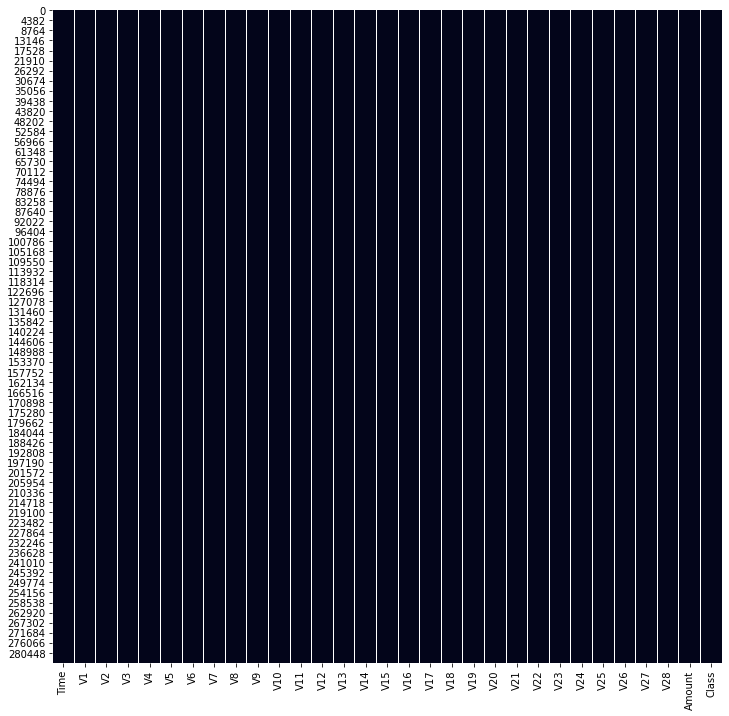

In [11]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(df.isna(), cbar=False)

In [12]:
# dataset's NA values analysis
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Time      0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V16       0.0
Amount    0.0
V15       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
V1        0.0
V14       0.0
Class     0.0
dtype: float64

In [13]:
# dataset's duplicated analysis
df.duplicated().sum()

1081

## 3.2 Deep data's features/ targets and values analytics

**Brief features engineering:** <br>

- Drop of the duplicates
- to transform the time in day time

**Features names & values analysis:**<br>

    - Class:  is the response variable and it takes value 1 in case of fraud and 0 otherwise
    - Amount:is the transaction Amount  
    - Time: contains the seconds elapsed between each transaction and the first transaction in the dataset
     

**Target variable visulisation :** <br>
- "Class" 1: credit card transaction fraud, 0: regular credit card transaction<br>
⚠️⚠️⚠️ **"target variable"** as expected in anomaly datasience approch the target variable is not balanced betewen **"Class = 1 and Class = 0**. in anomaly approh, during the pre processing will perform some dataset's balacing operation <br>

**Features /Target analysis:**
Variable doesn't seems to coeralat with class V15,V20,V22,V23,V24,V25,V28

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#3.2.1 Brief features engineering:

In [9]:
#drop the duplicate
df=df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
# to transform the time in day time
df['Time_day'] = df['Time'].apply(lambda x : x/ 3600 %24)
df['Time_day'] = df['Time_day']/24.
df=df.drop('Time',axis=1)

In [17]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000012
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000012
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.999838
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.999850
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.999861
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.999861


#3.2.2**Target variable visulisation** <br>
- "Class" 1: credit card transaction fraud, 0: regular credit card transaction<br>
⚠️⚠️⚠️ **"target variable"** as expected in anomaly datasience approch the target variable is not balanced betewen **"Class = 1 and Class = 0**. in anomaly approh, during the pre processing will perform some dataset's balacing operation <br>

In [18]:
#target's balance check
df['Class'].value_counts(normalize=True)*100

0    99.83329
1     0.16671
Name: Class, dtype: float64

# 3.2.3 Features /Target analysis

**Variable doesn't seems to coeralat with class:**<br>
- V15<br>
- V20<br>
- V22<br>
- V23<br>
- V24<br>
- V25<br>
- V28<br>  

In [14]:
fraud_positive_df= df[df['Class']== 1]

In [15]:
fraud_negative_df= df[df['Class']== 0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

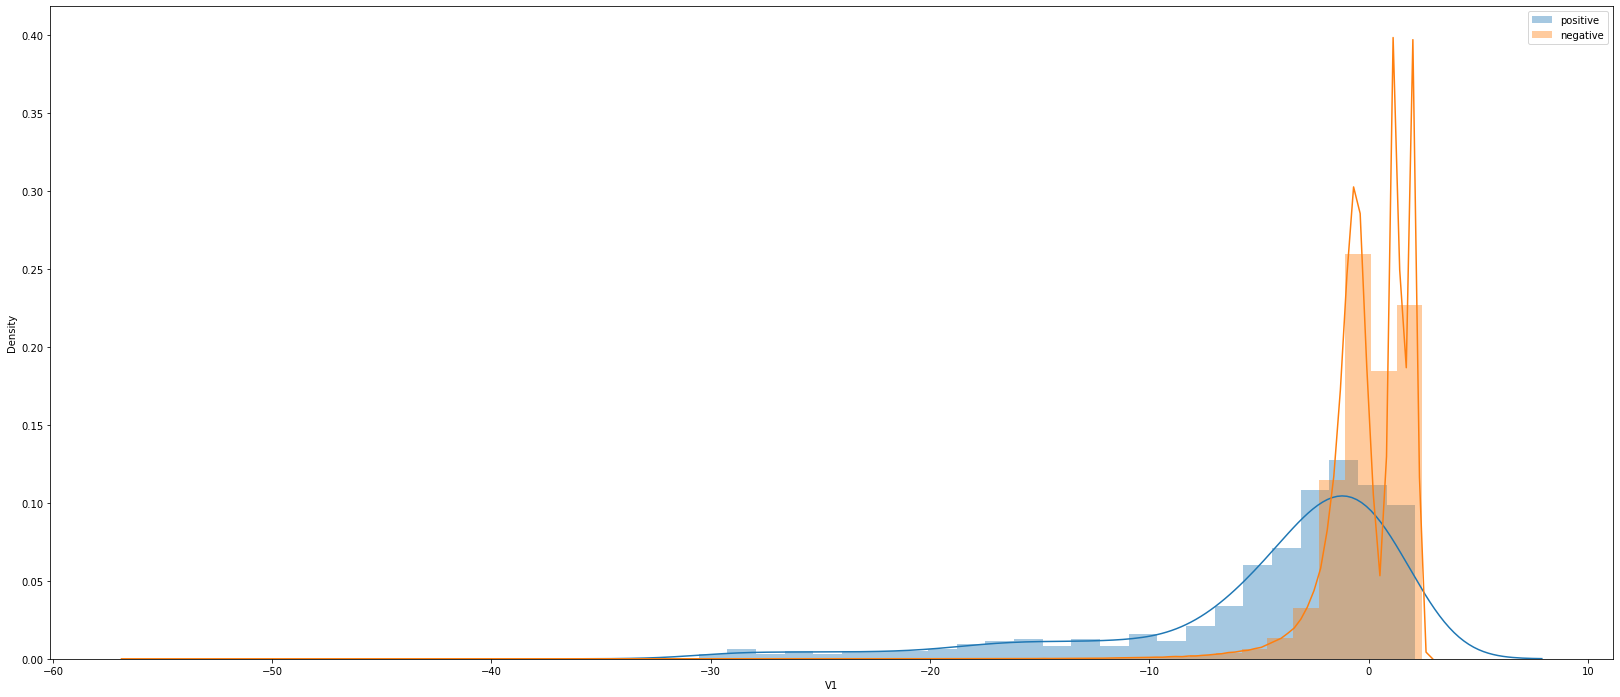

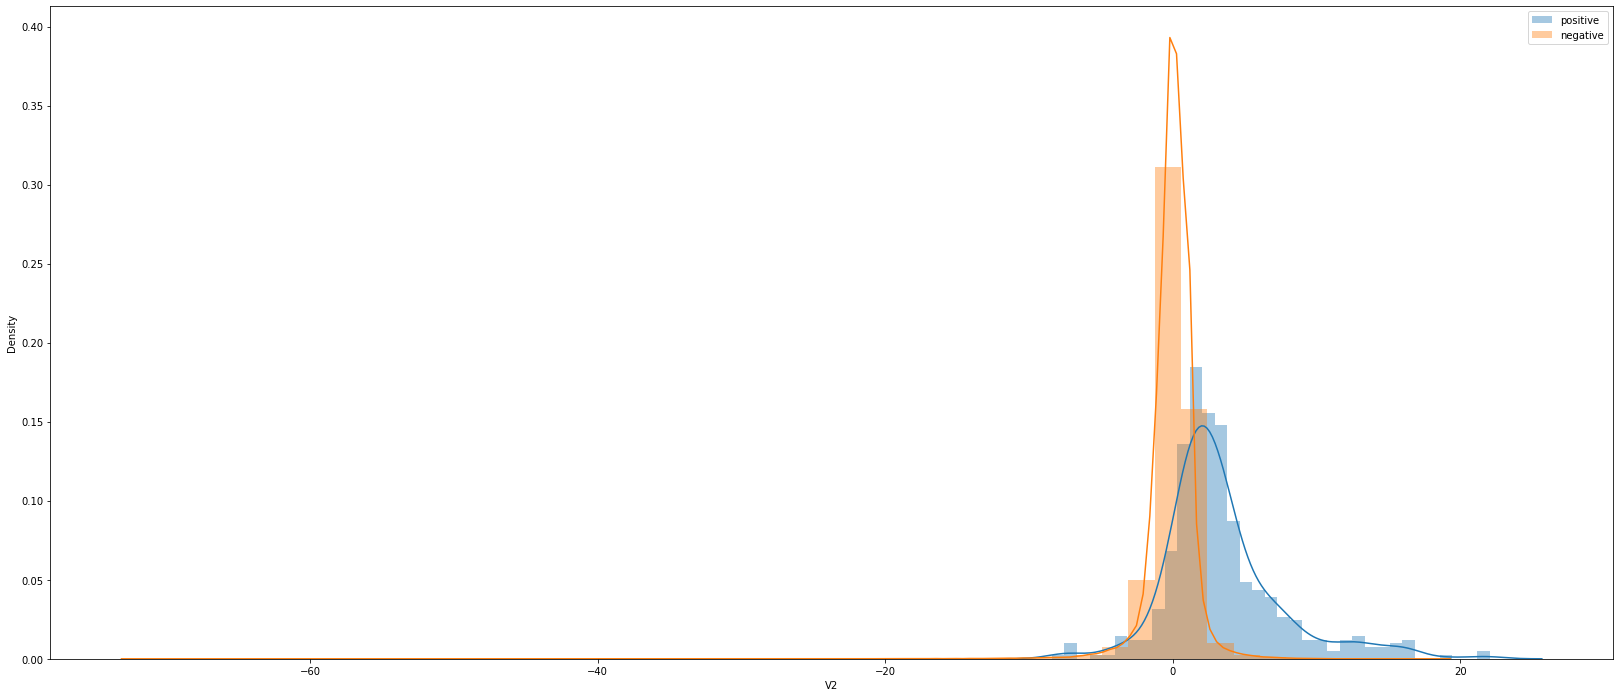

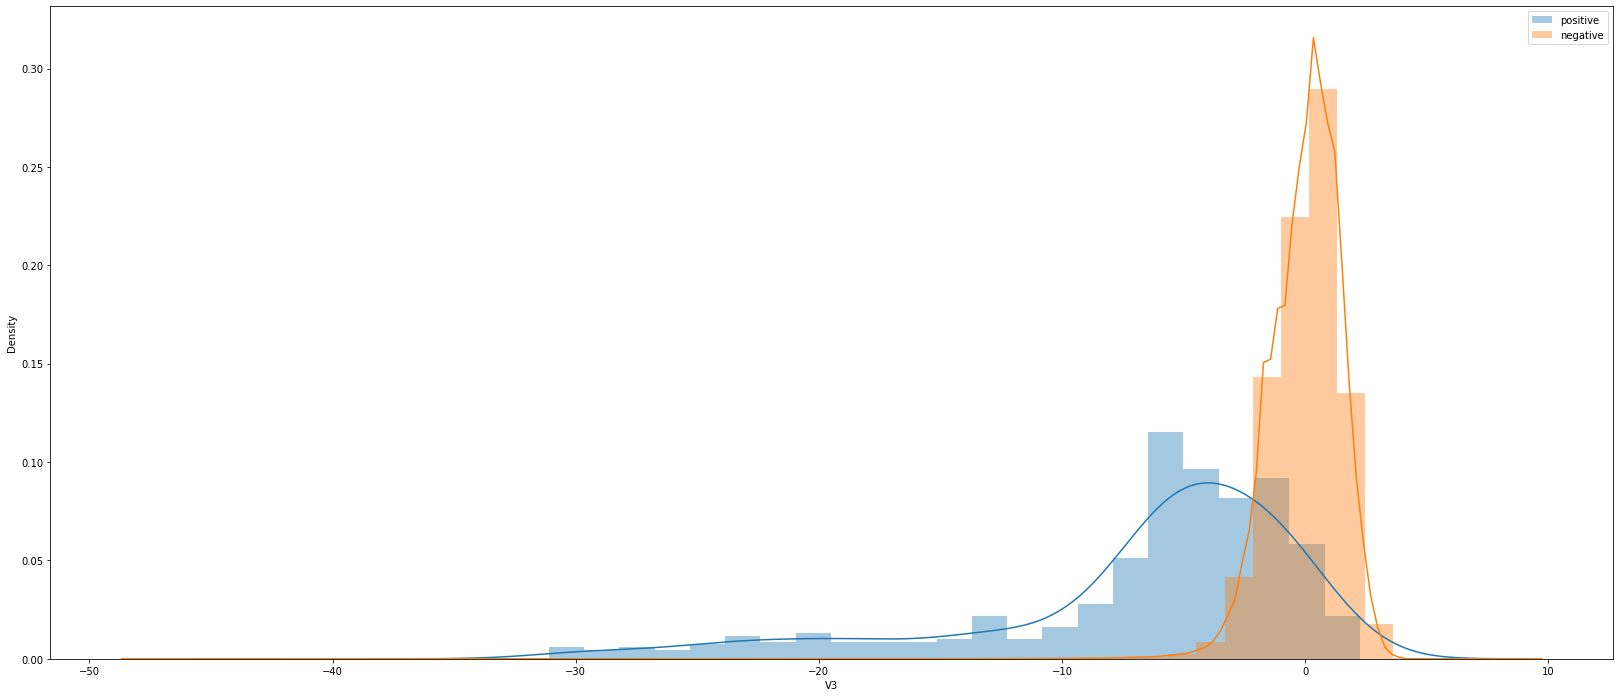

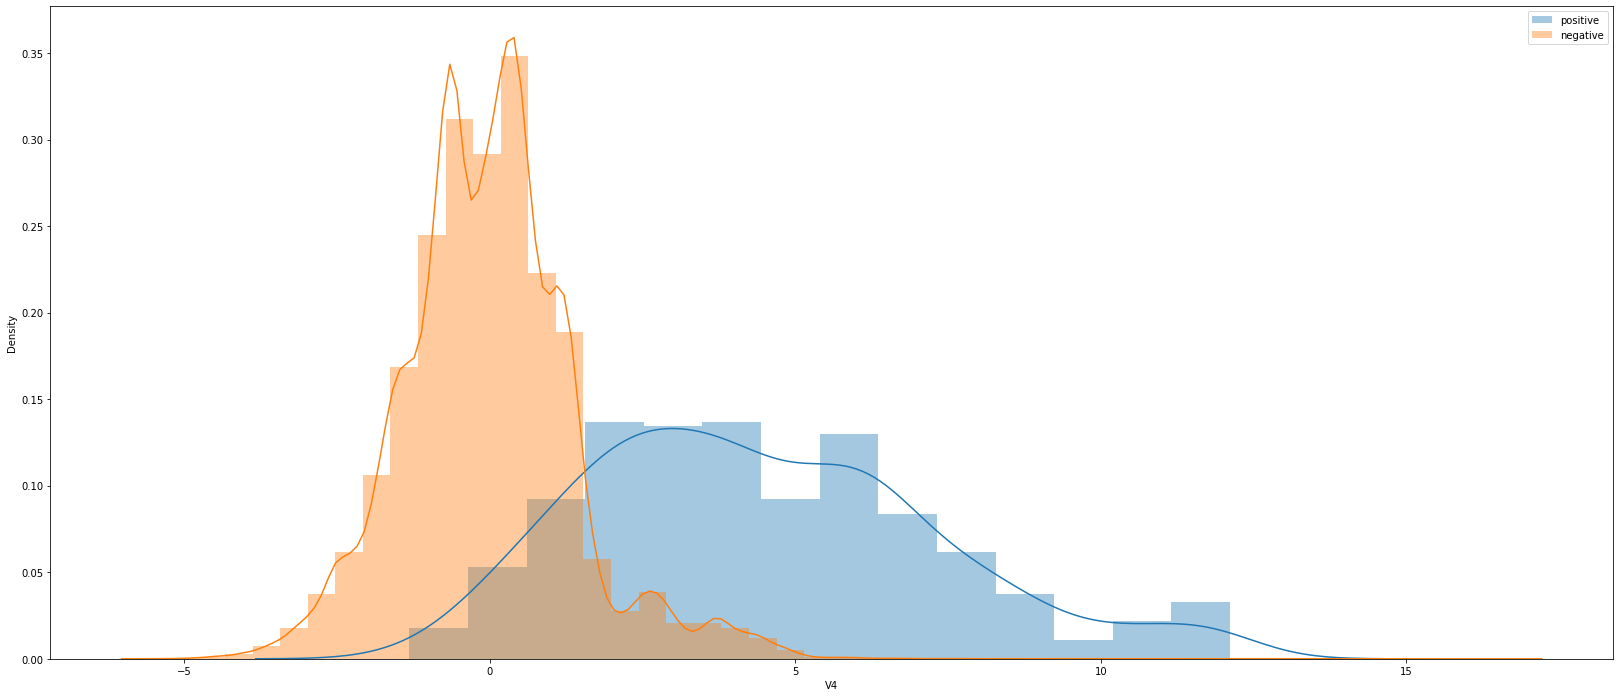

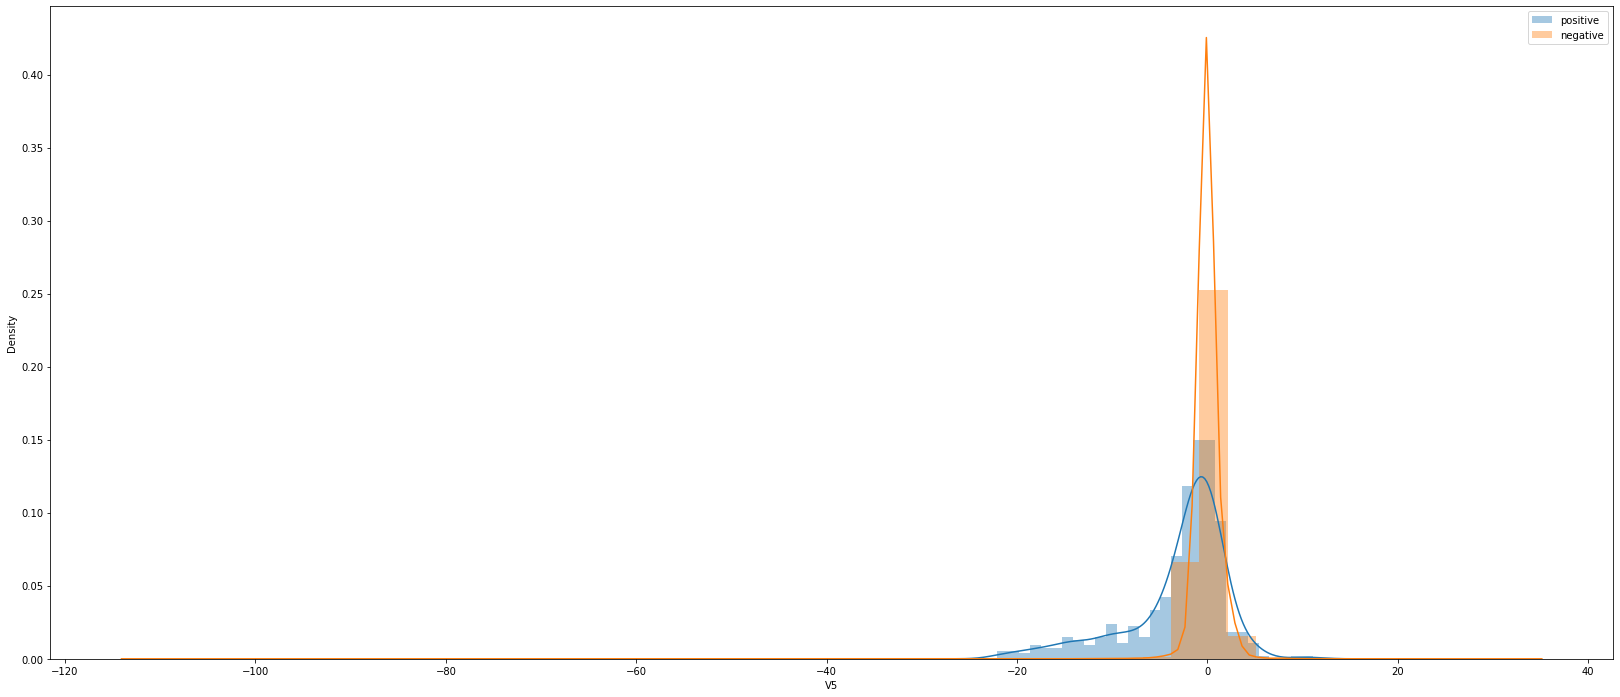

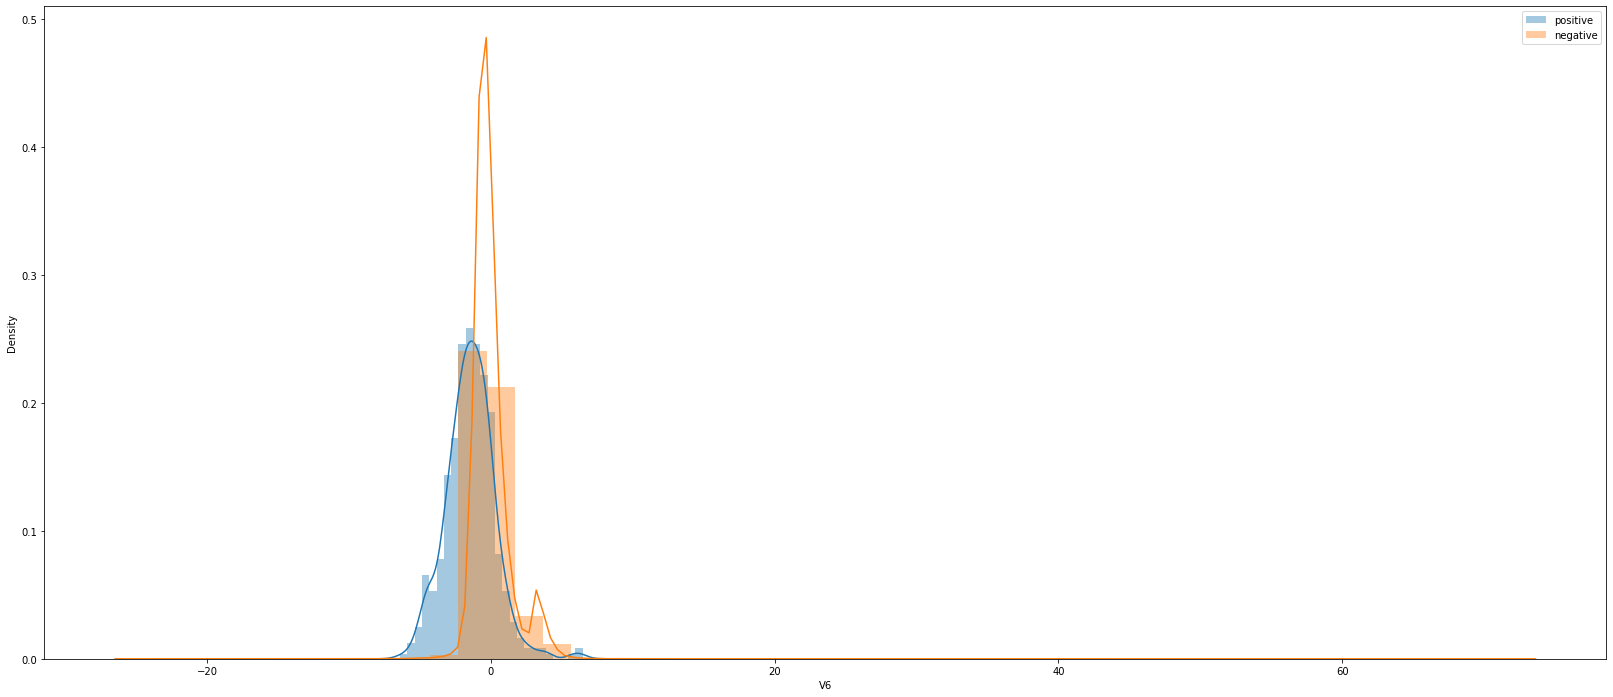

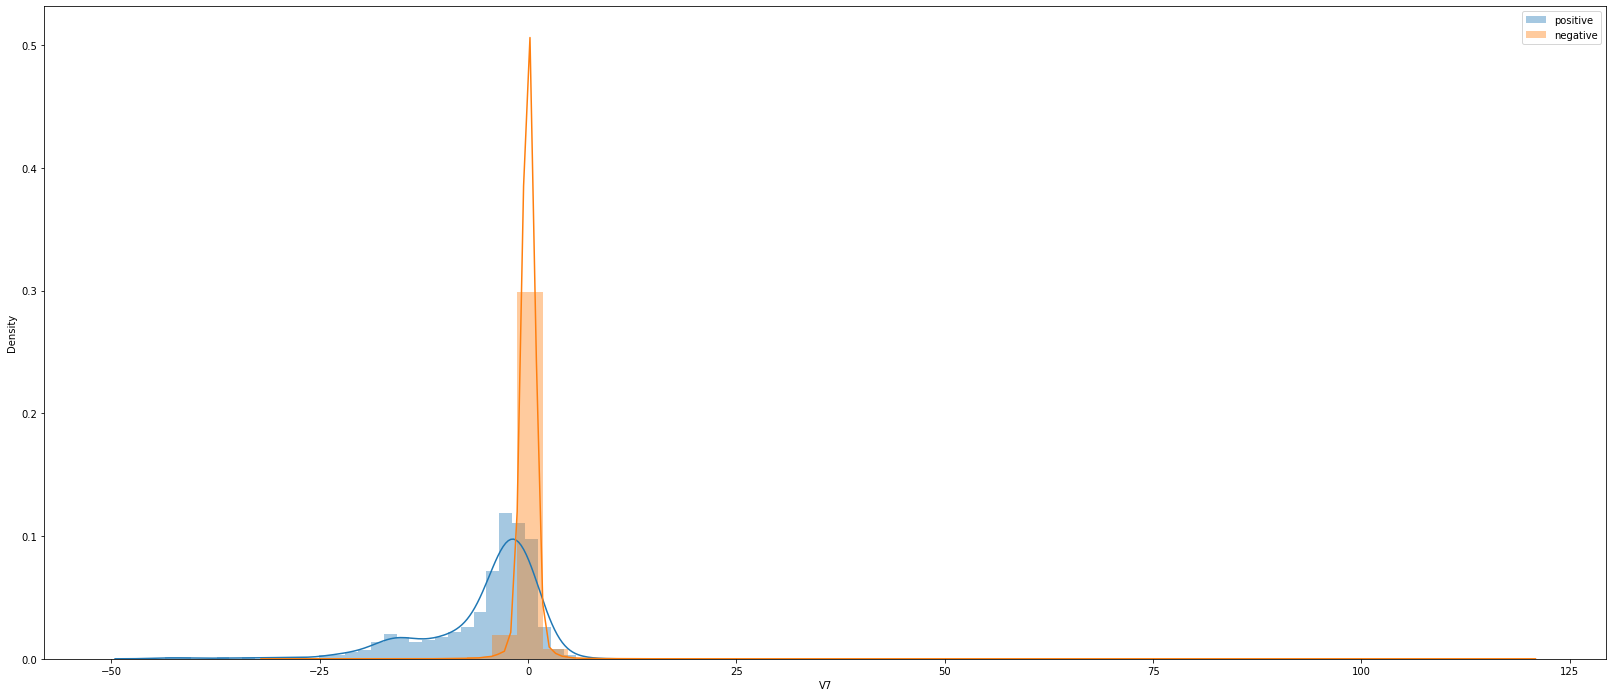

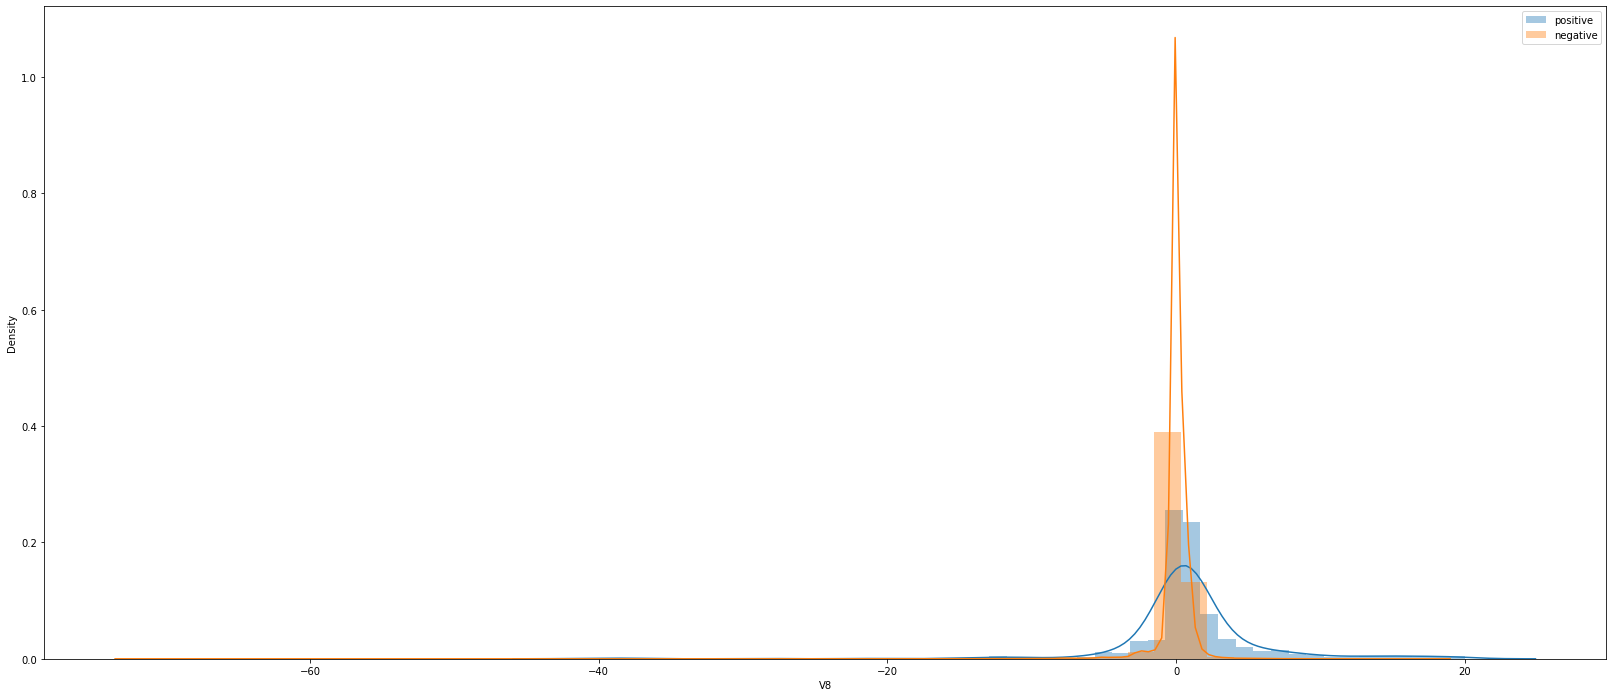

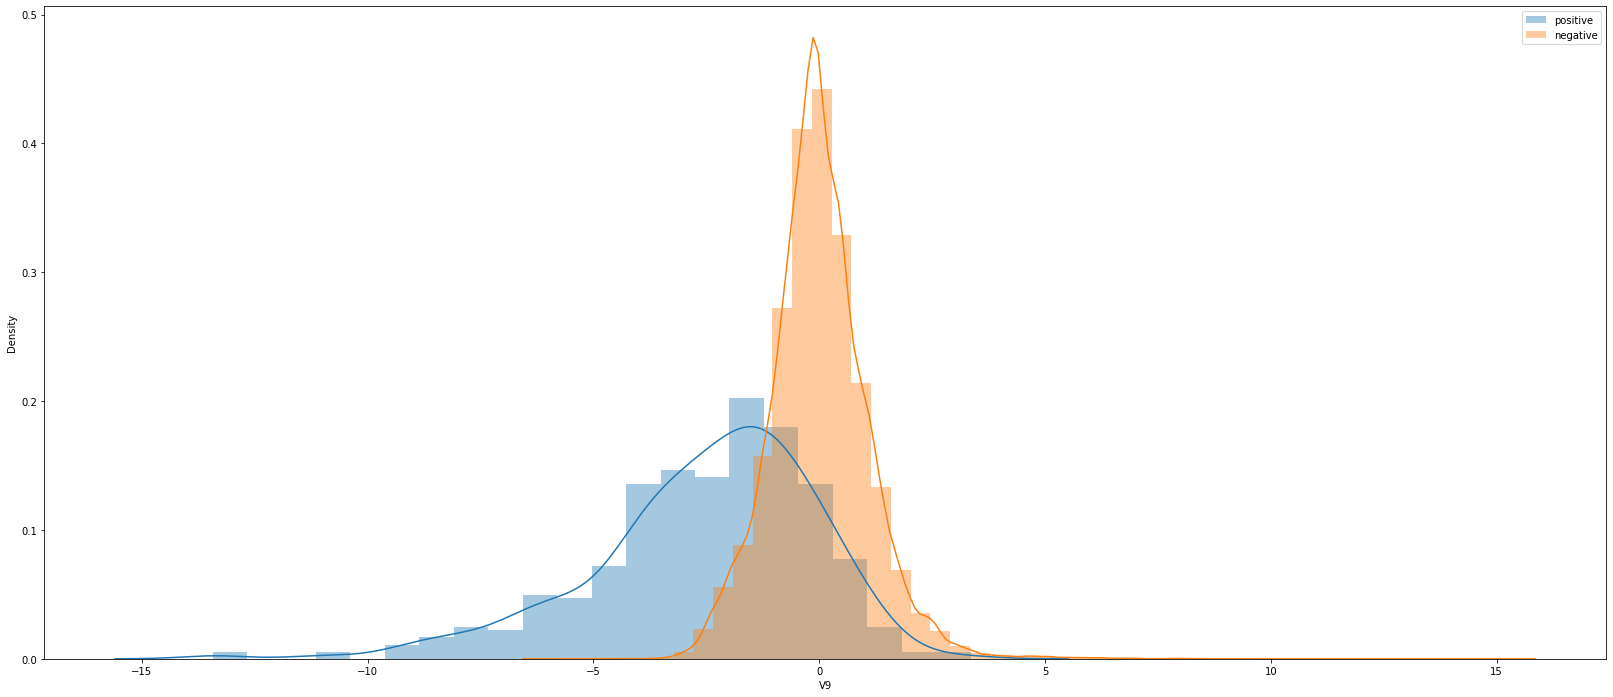

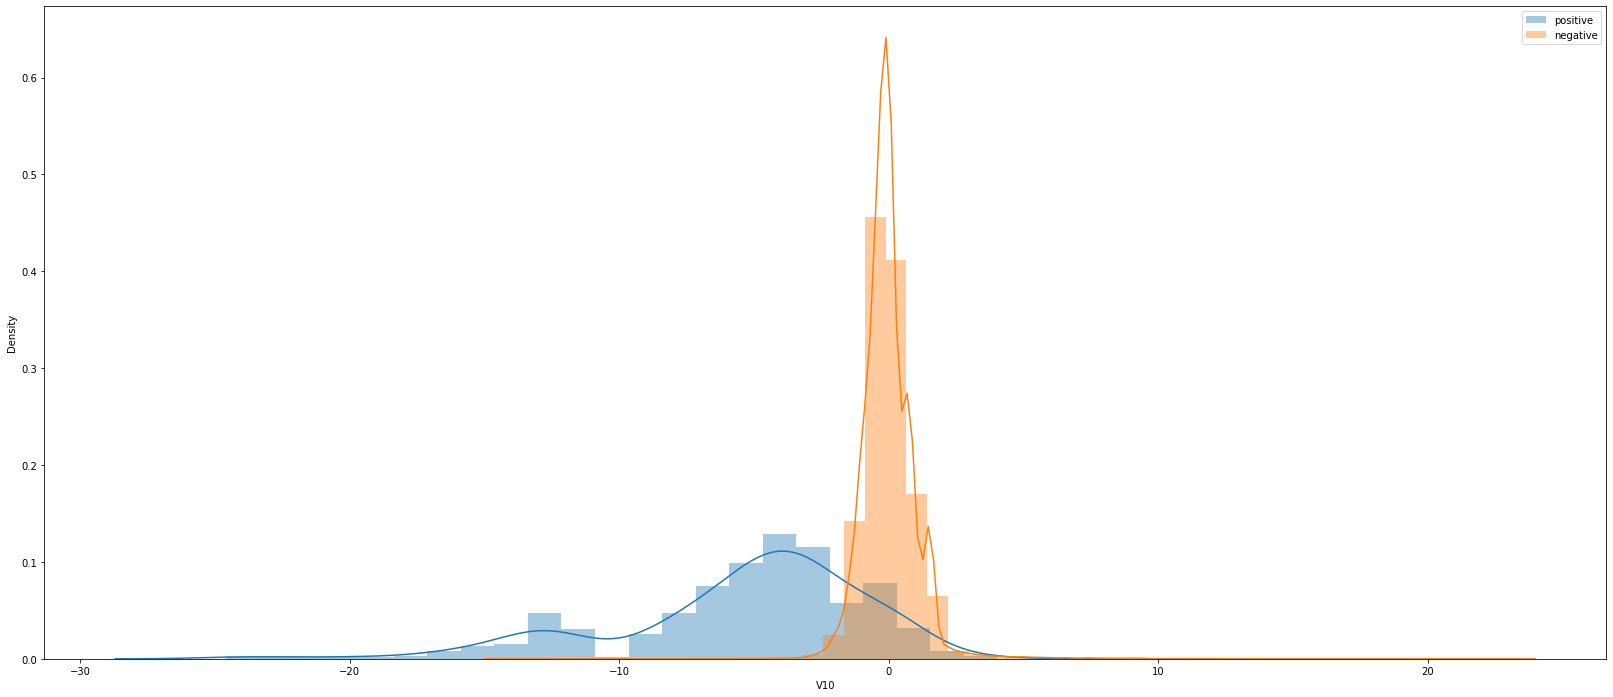

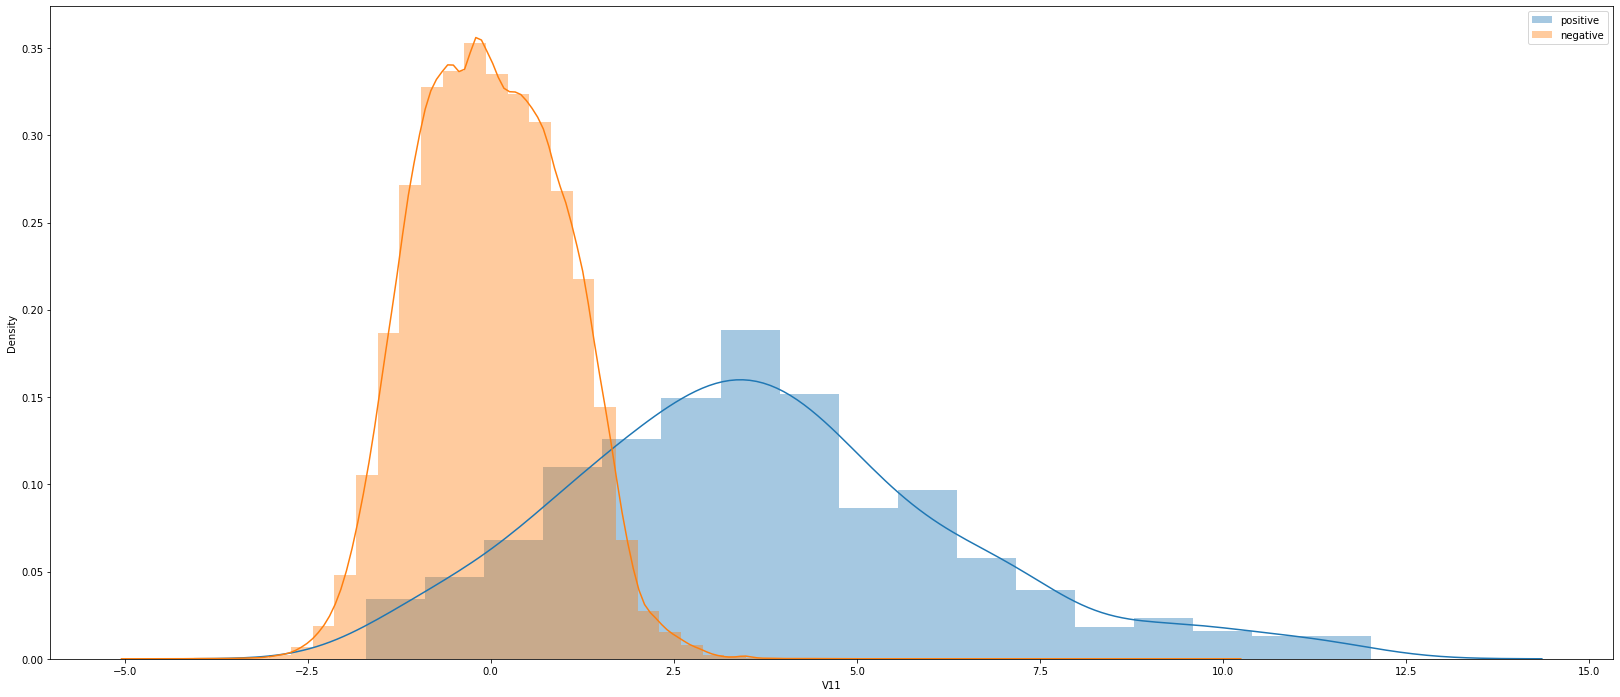

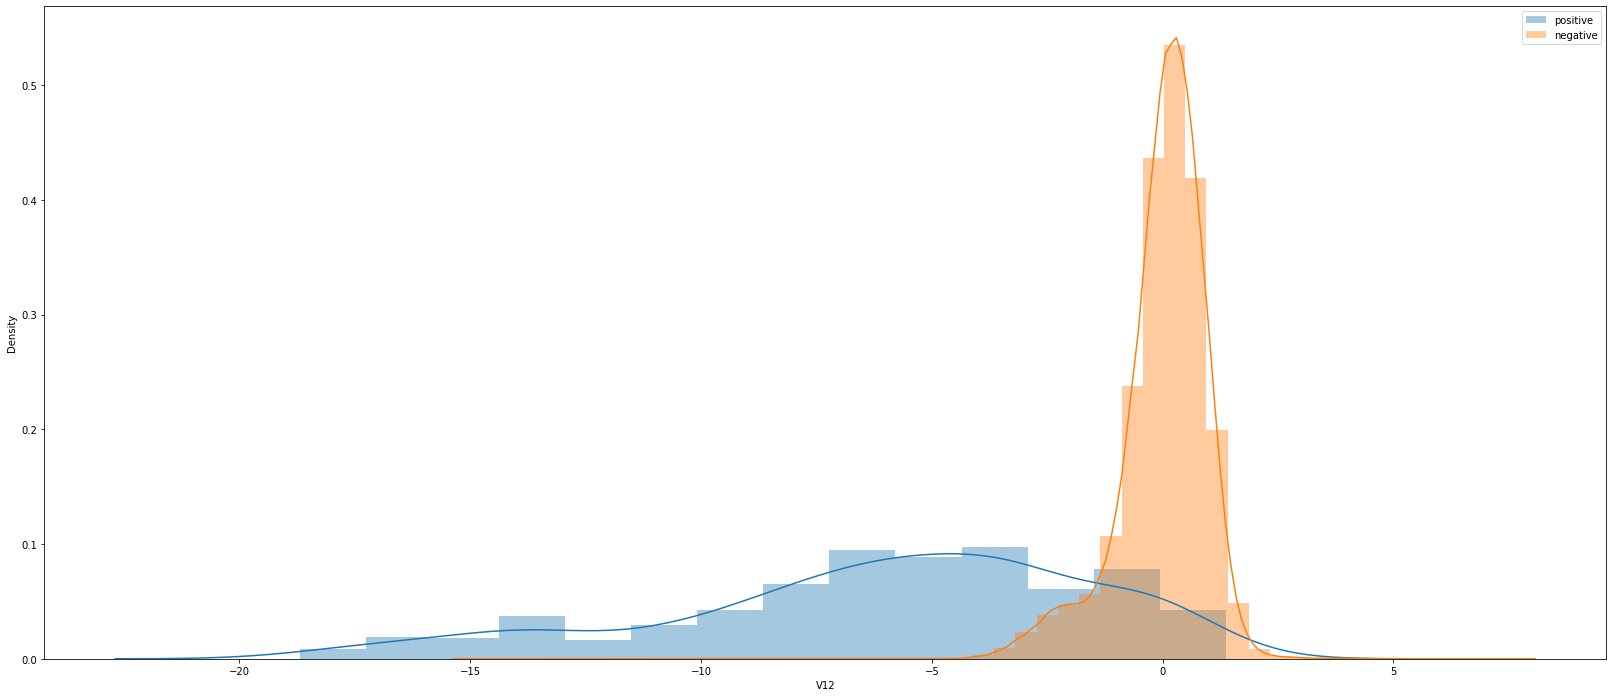

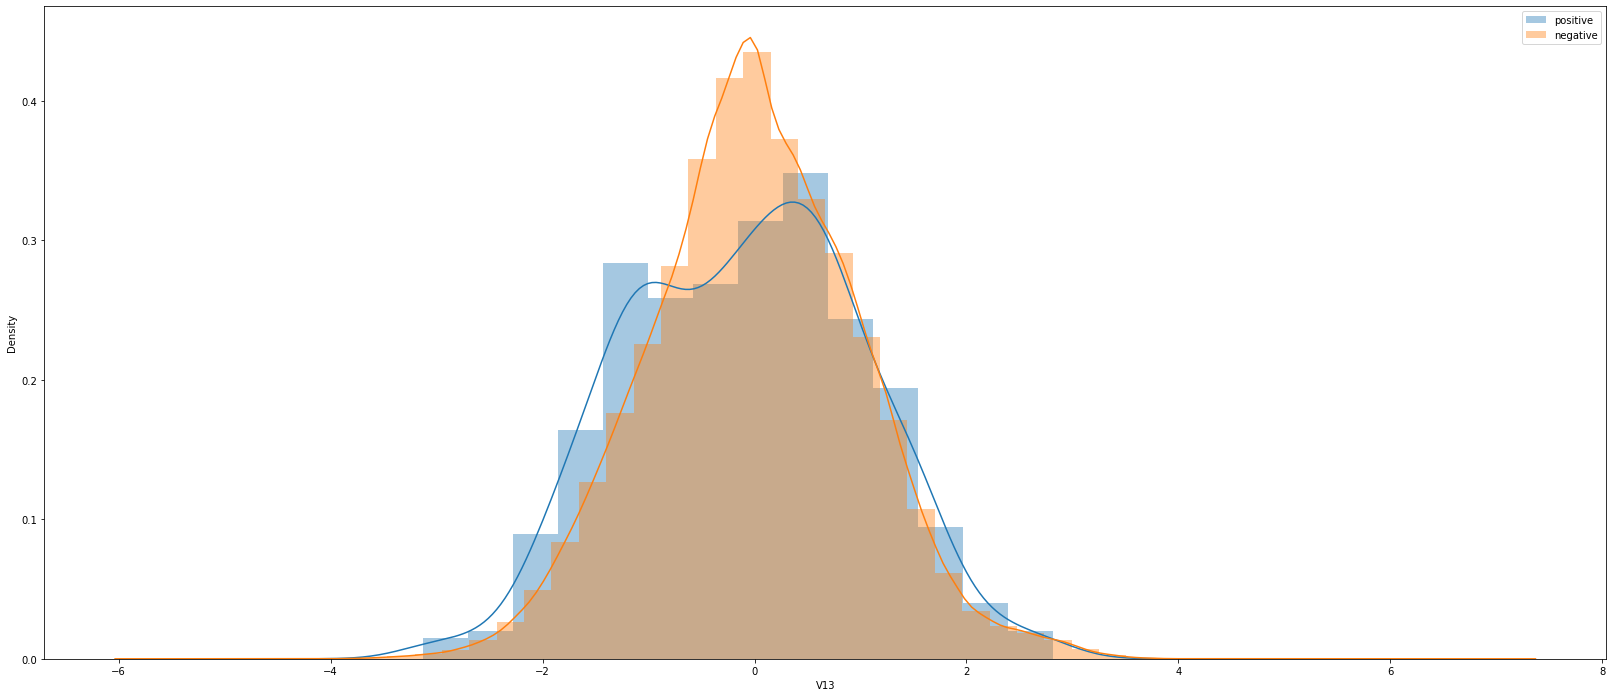

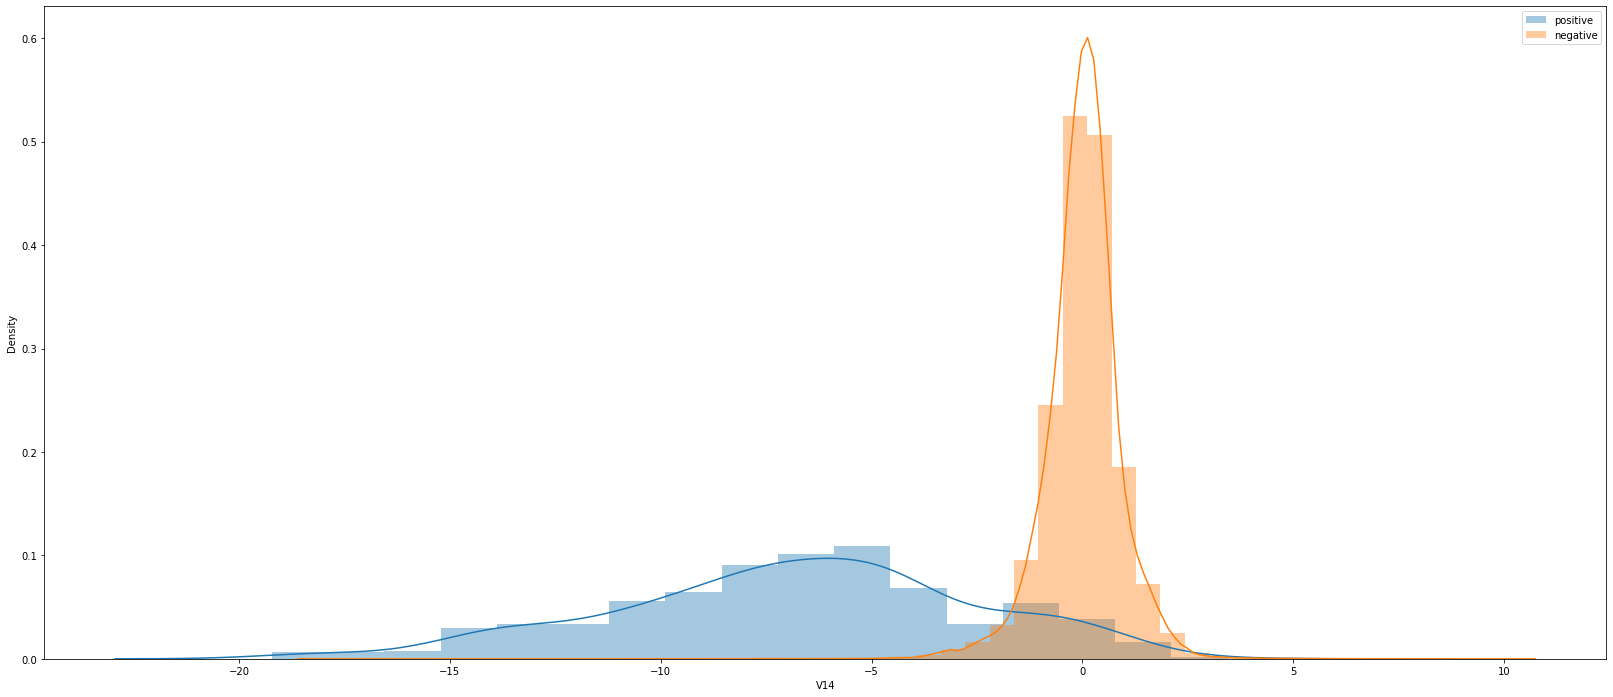

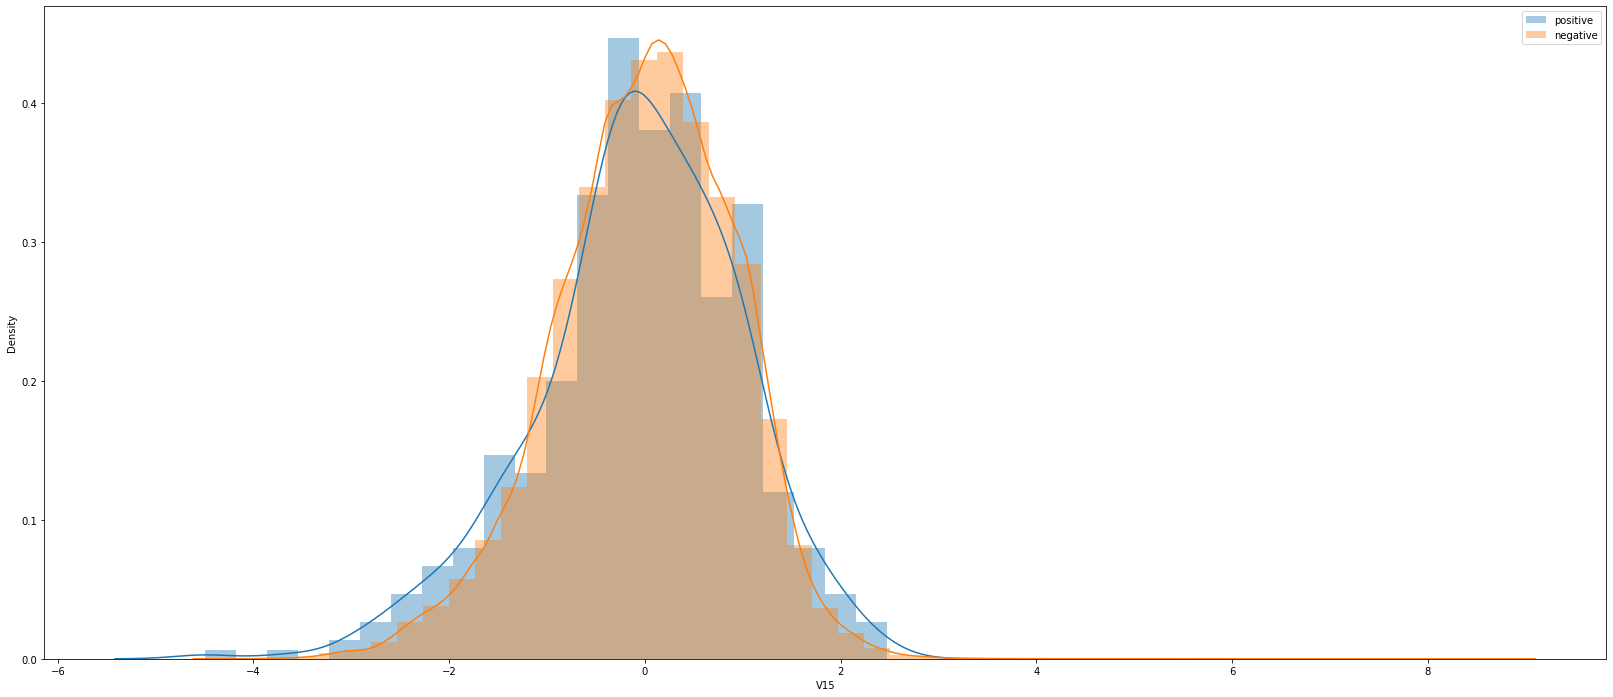

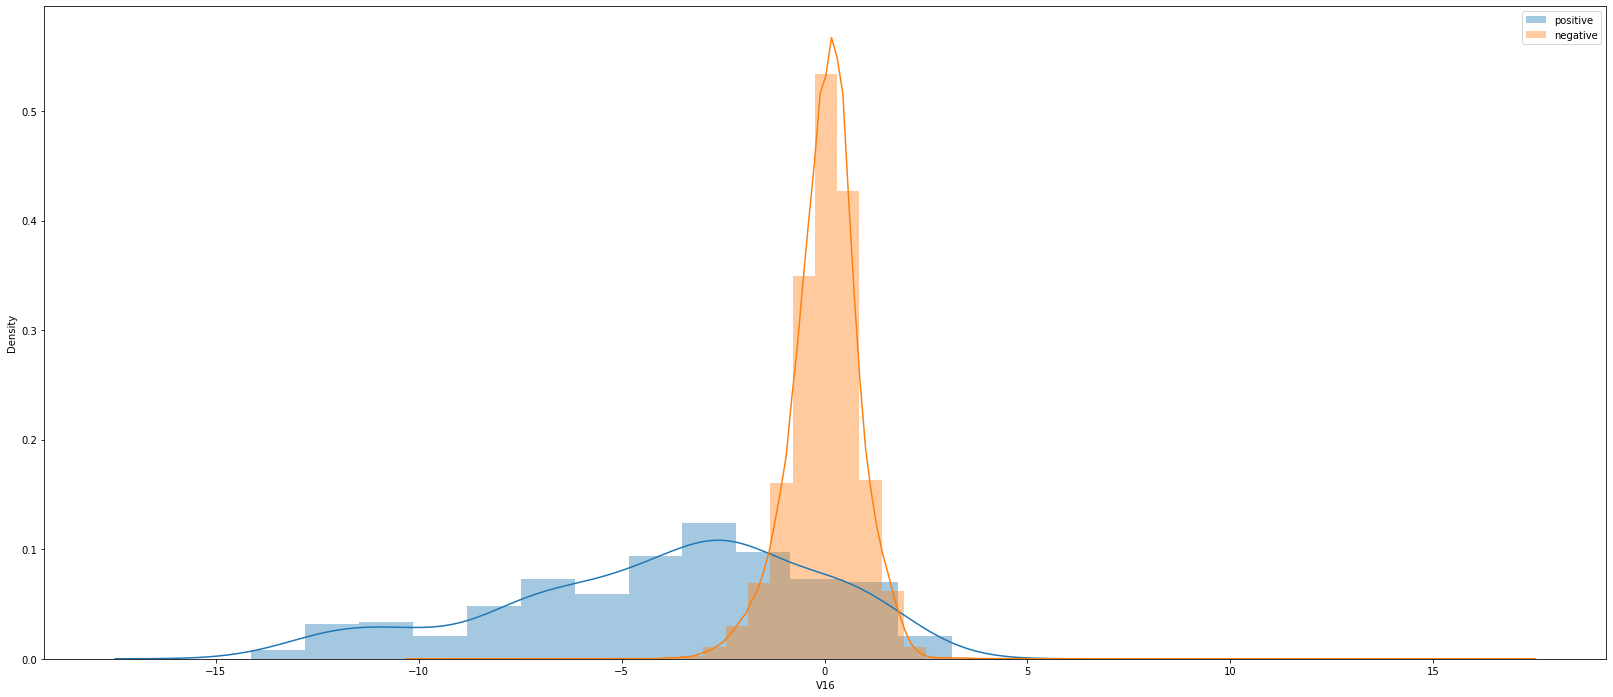

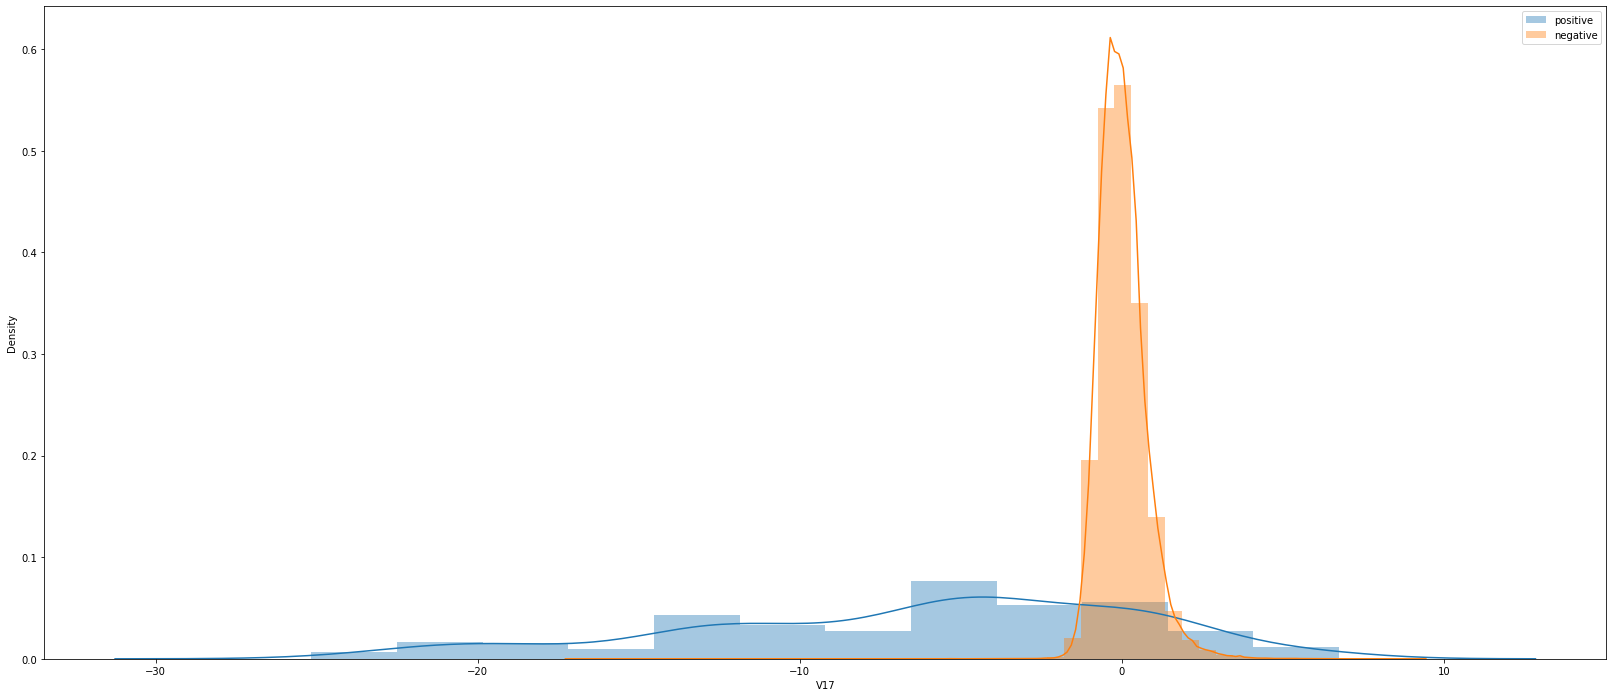

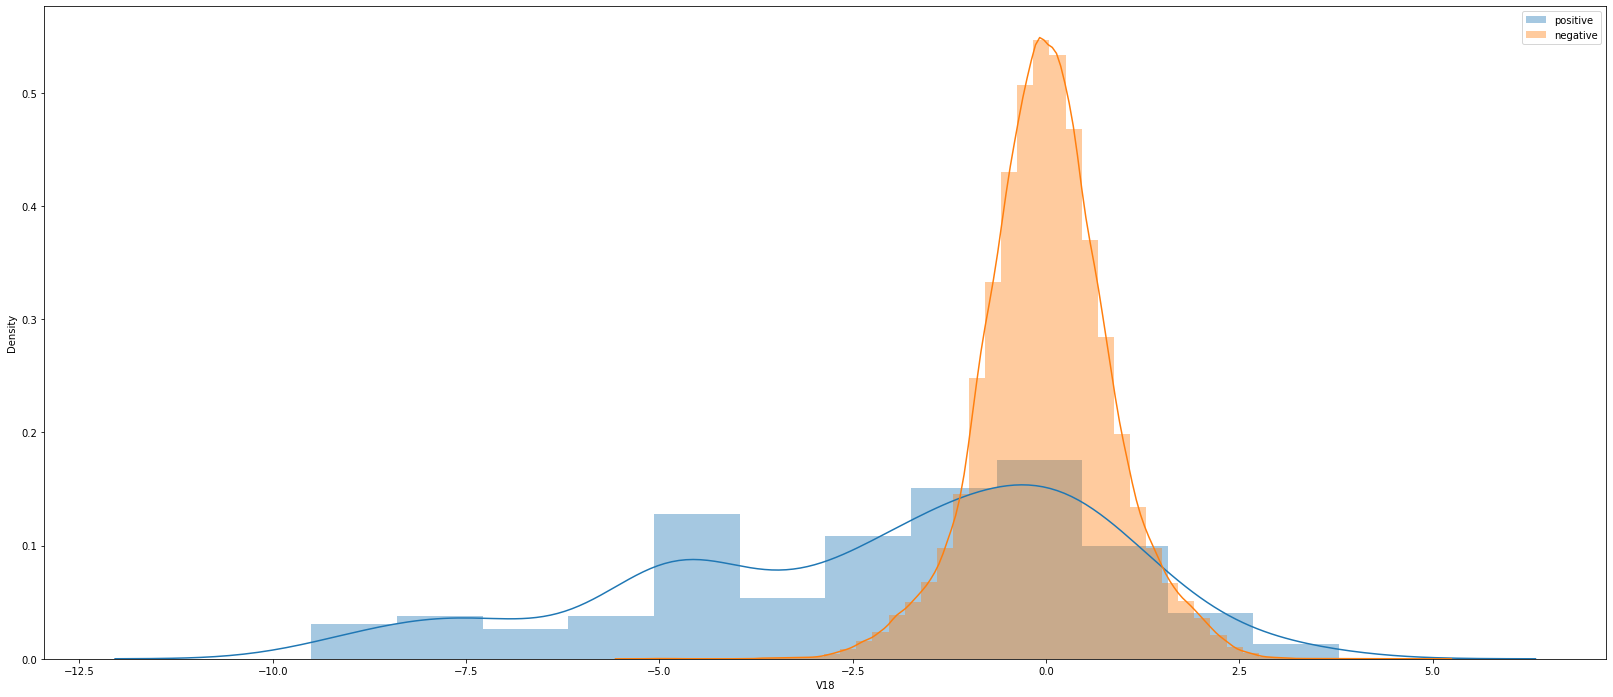

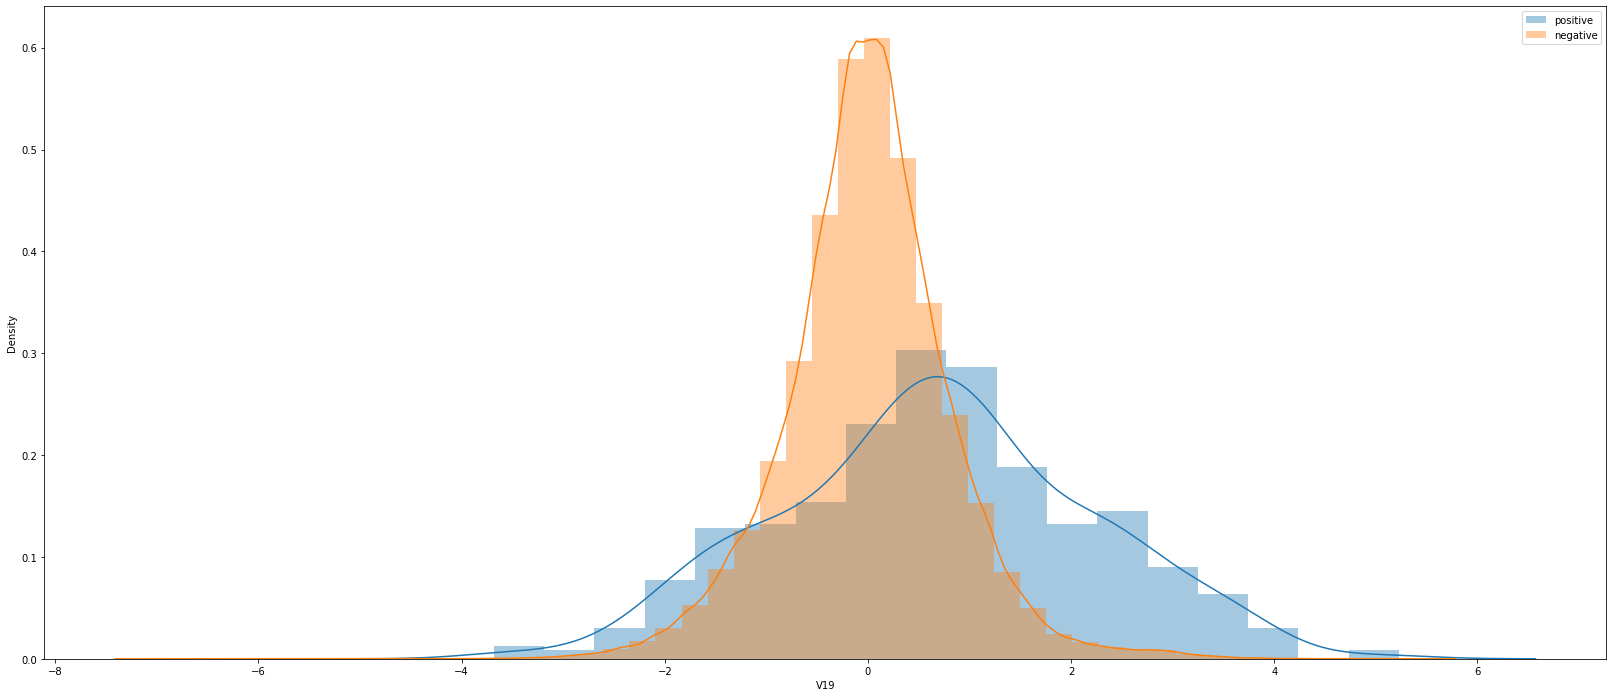

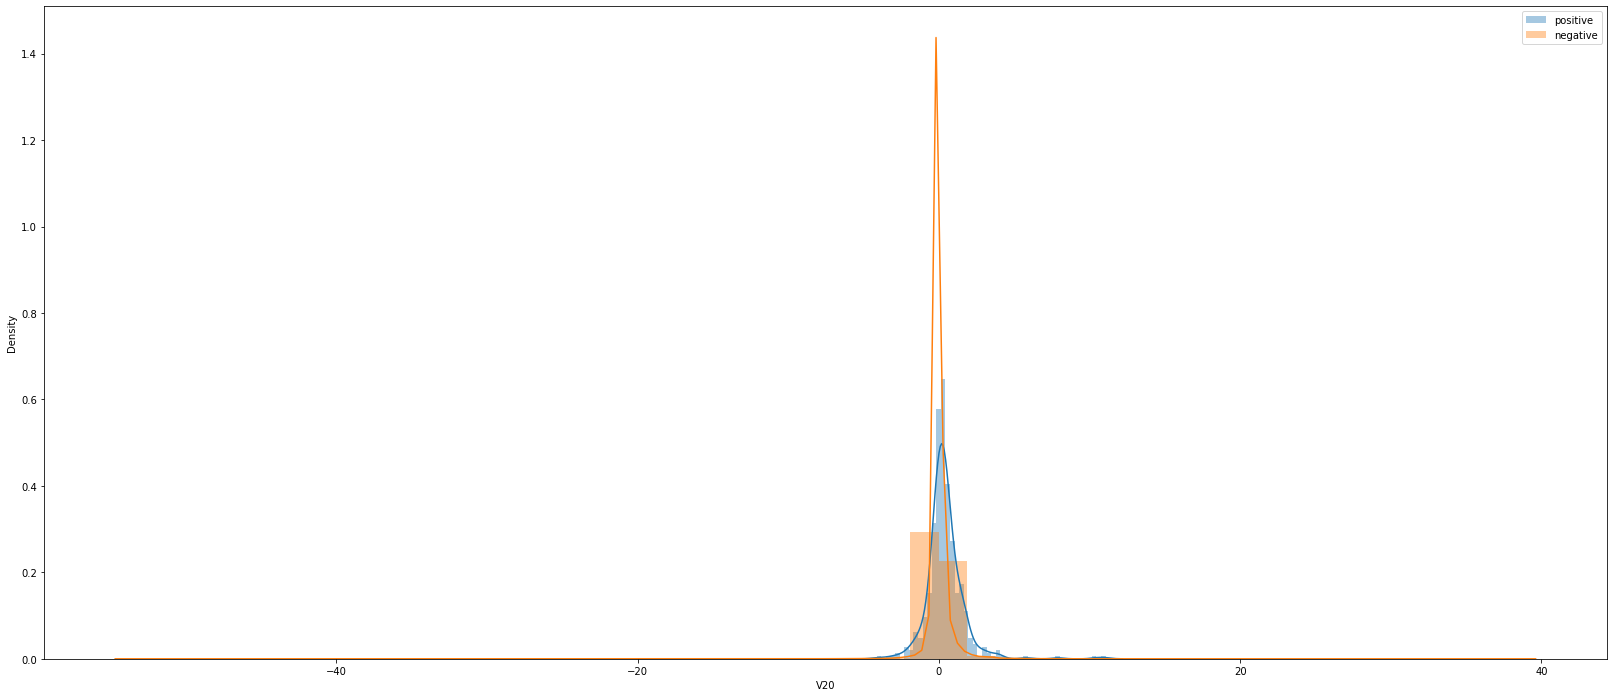

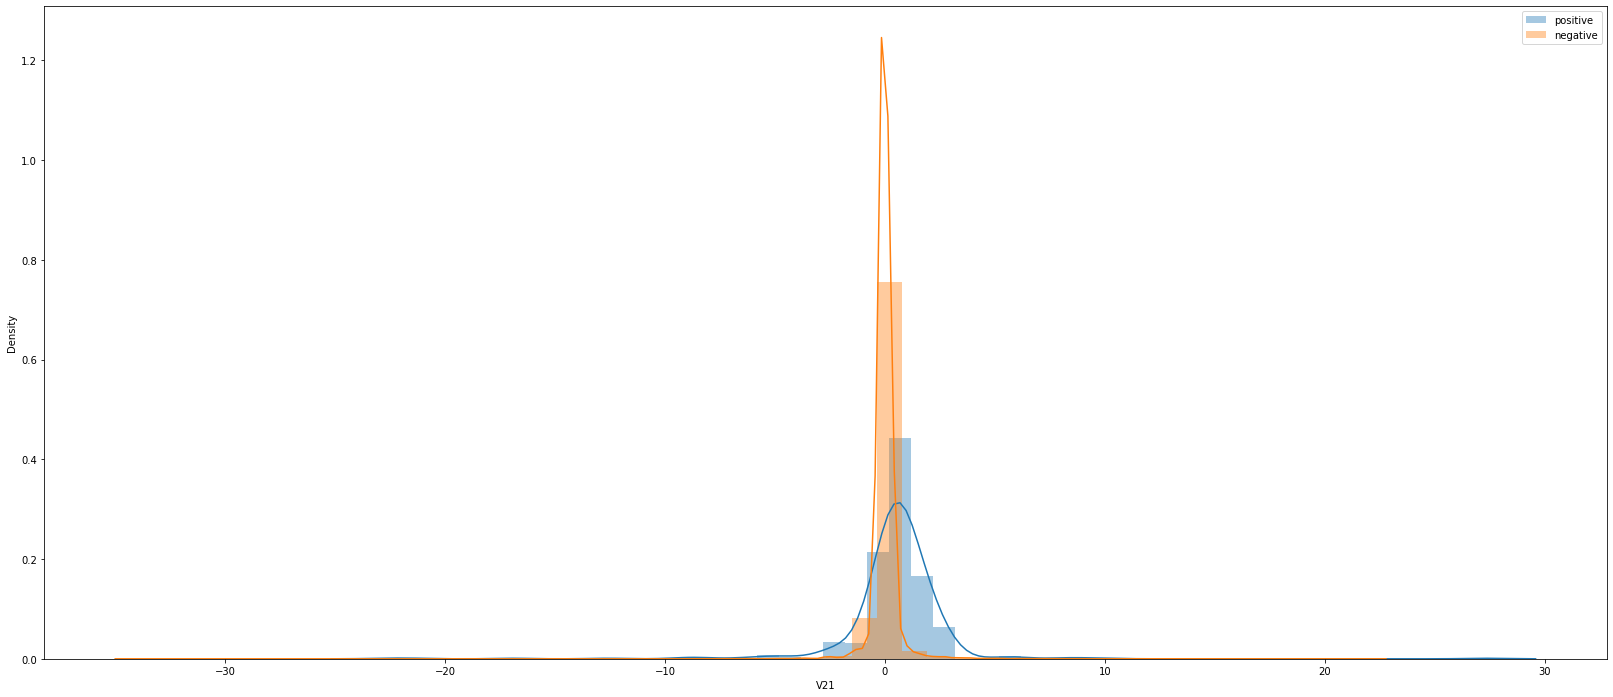

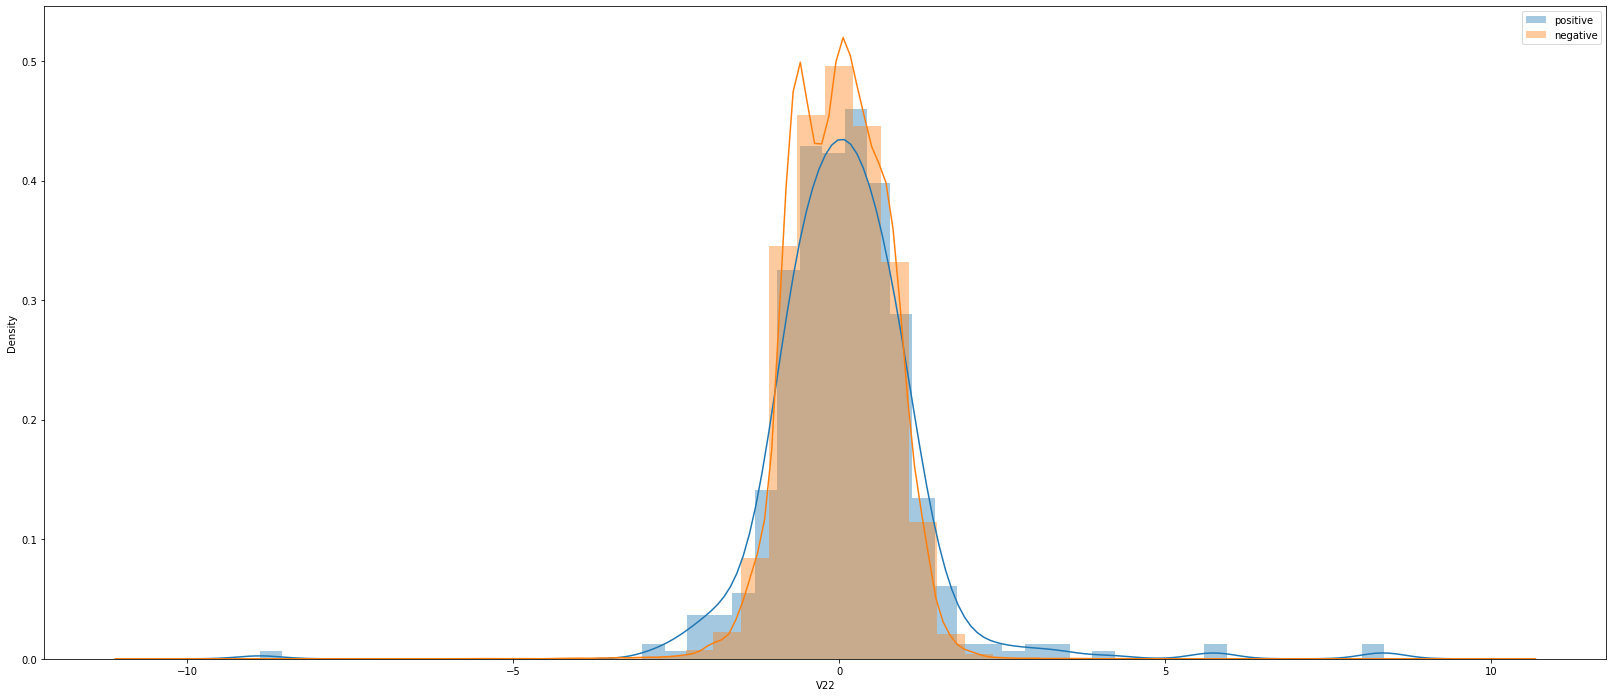

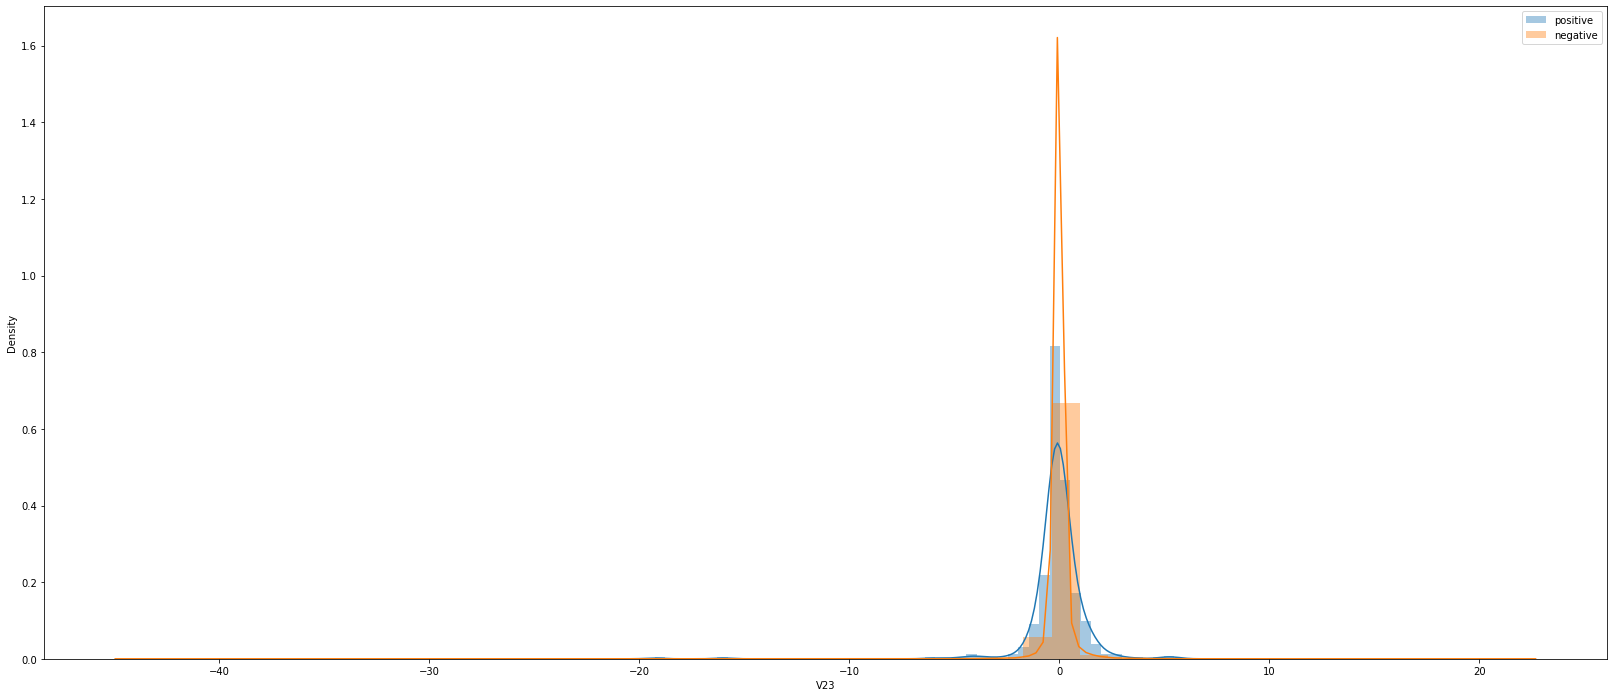

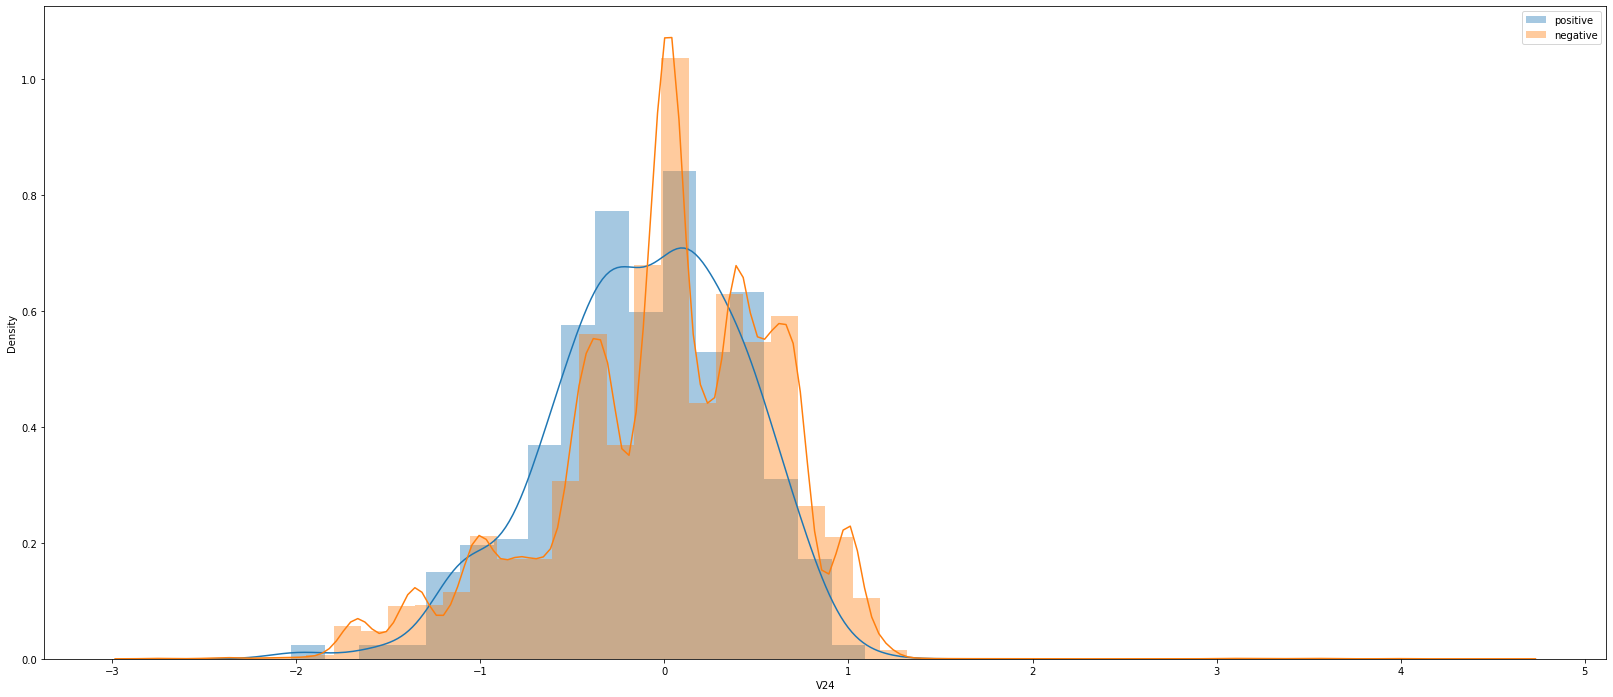

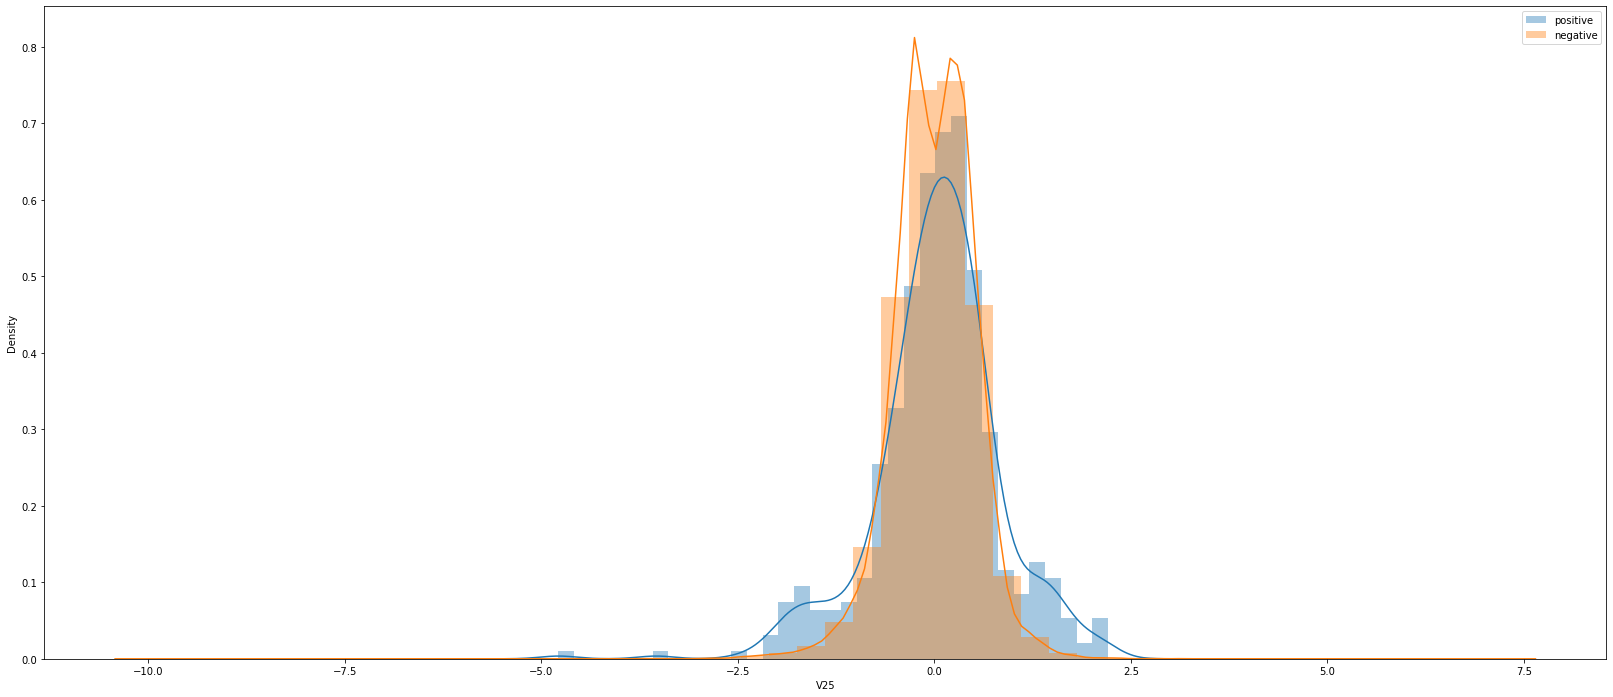

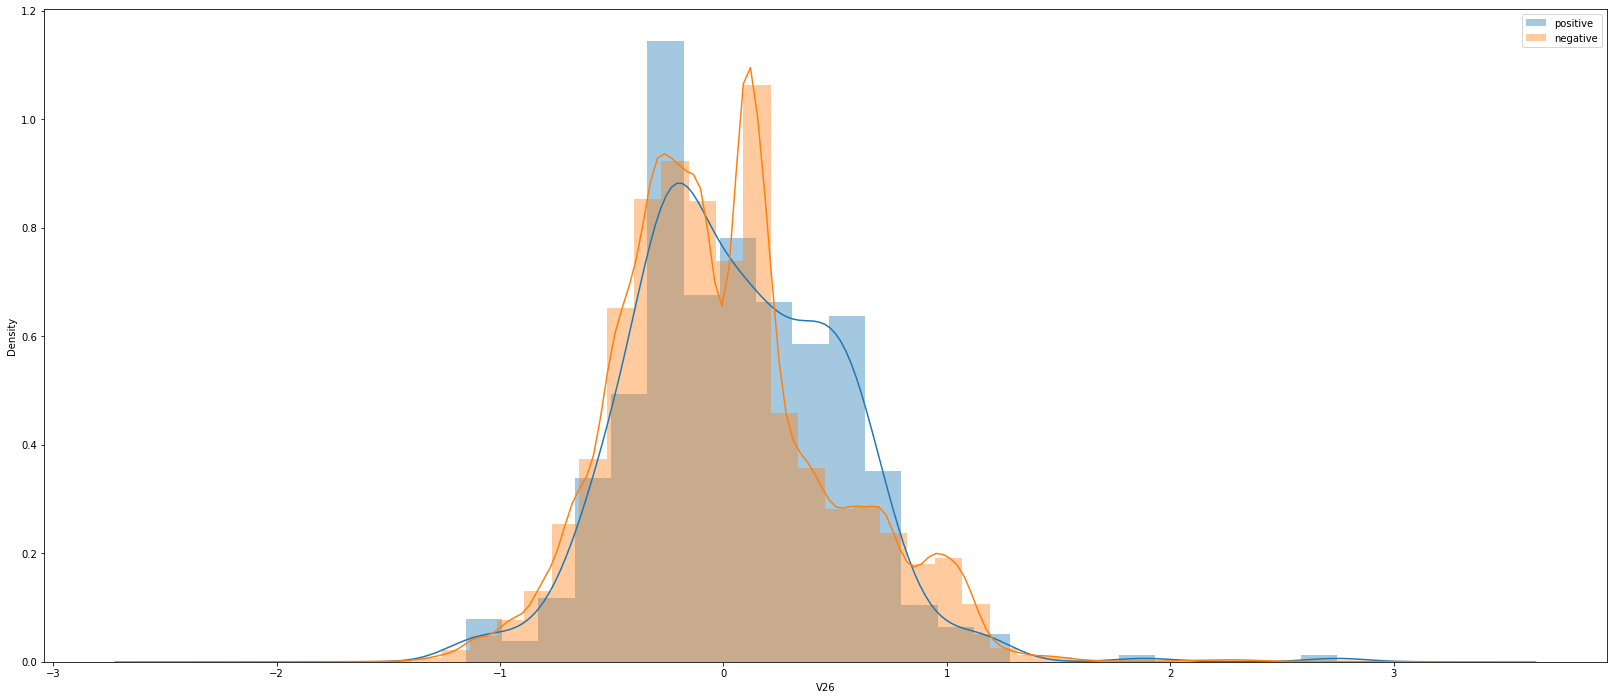

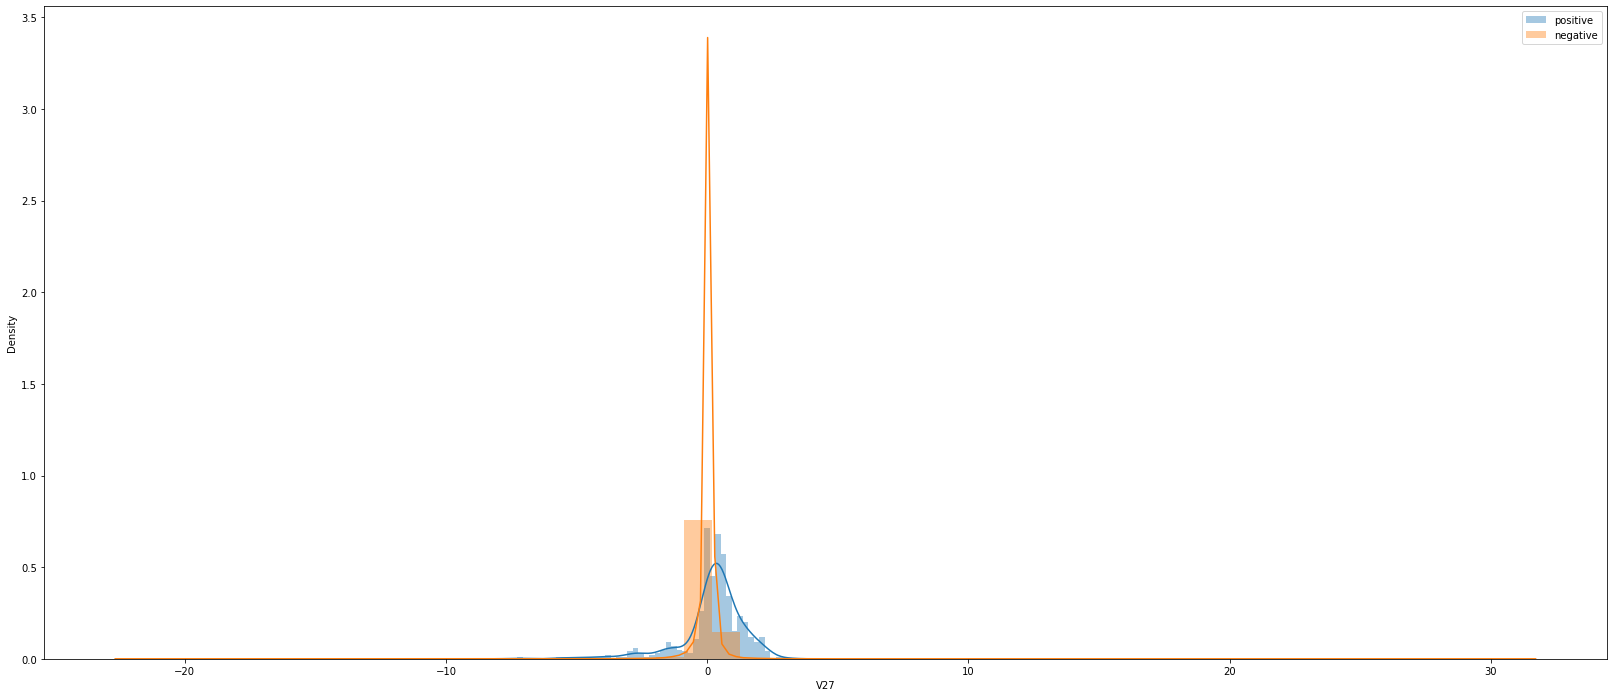

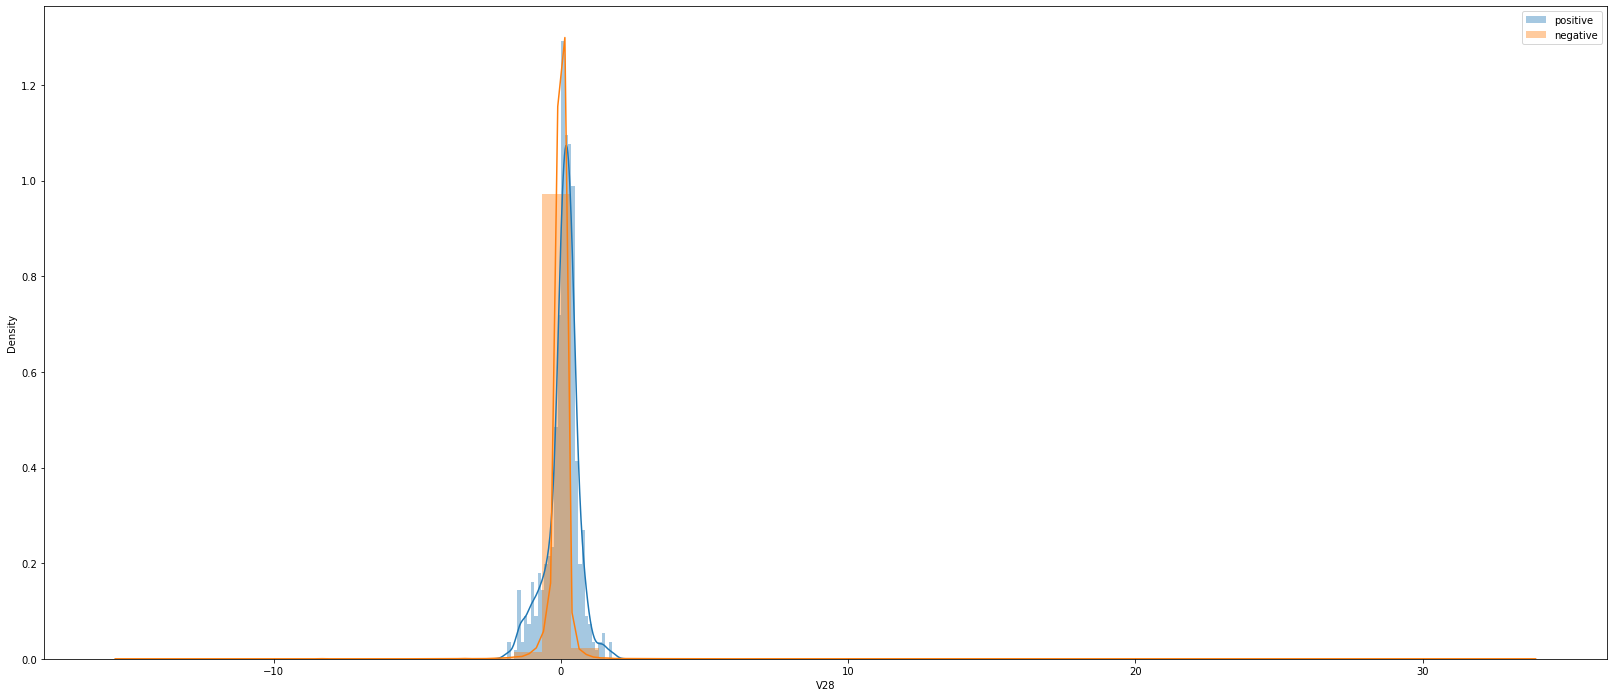

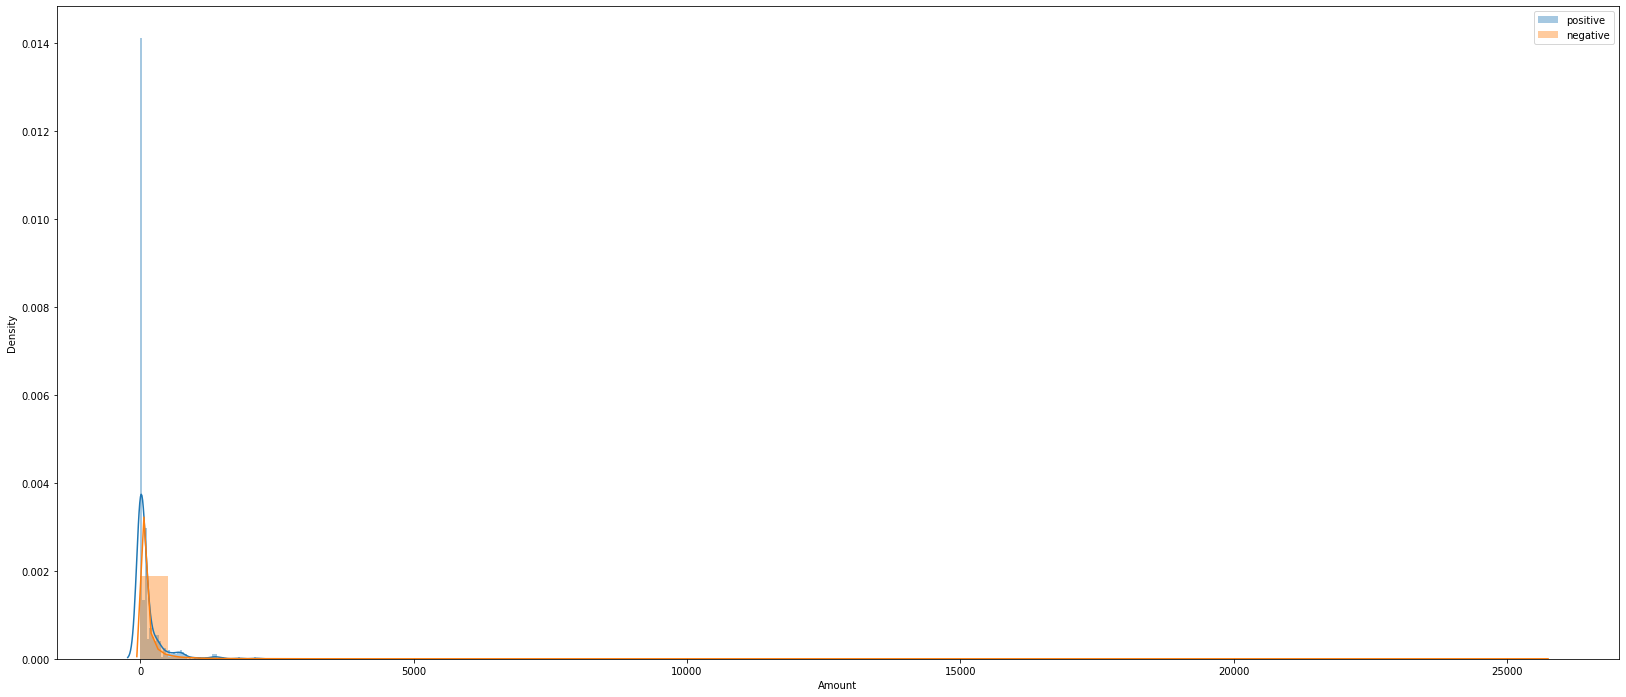

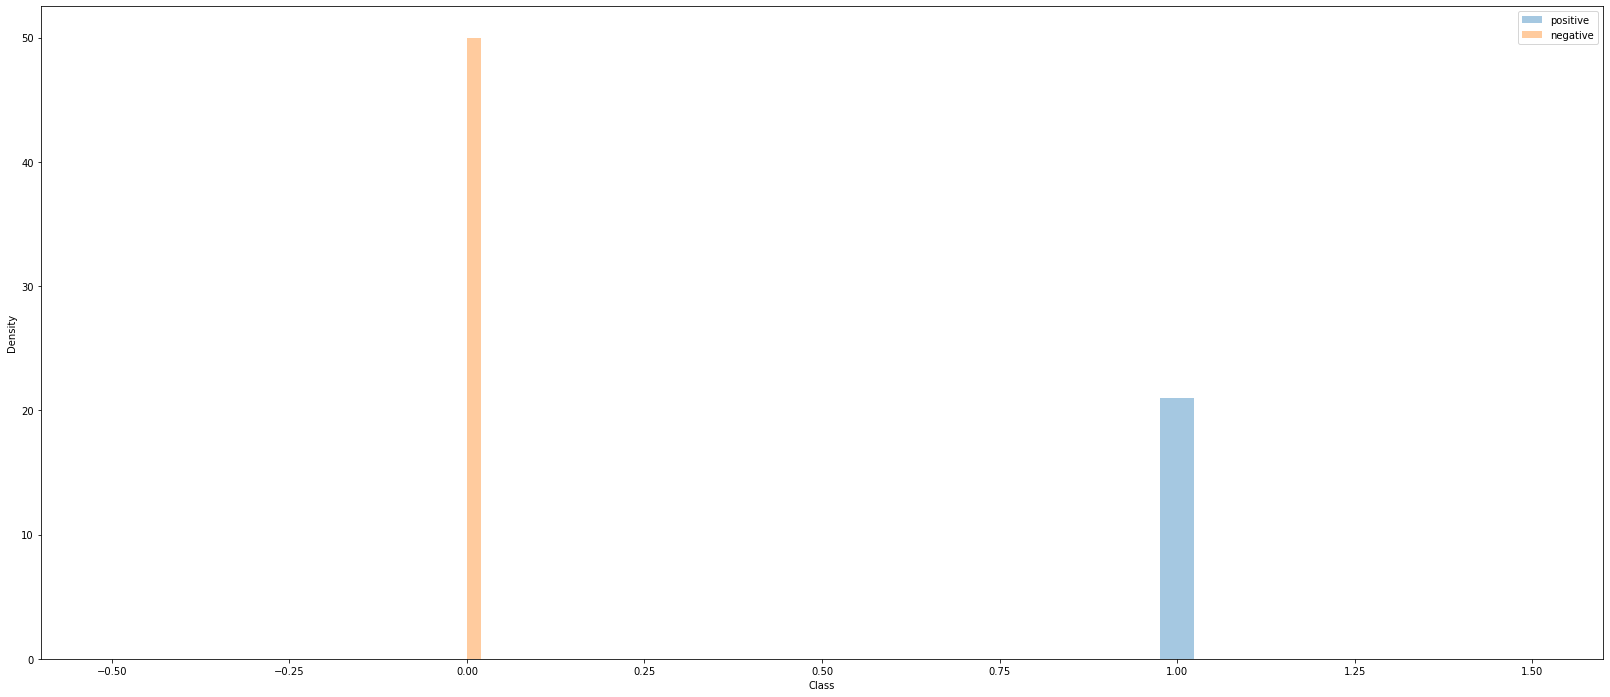

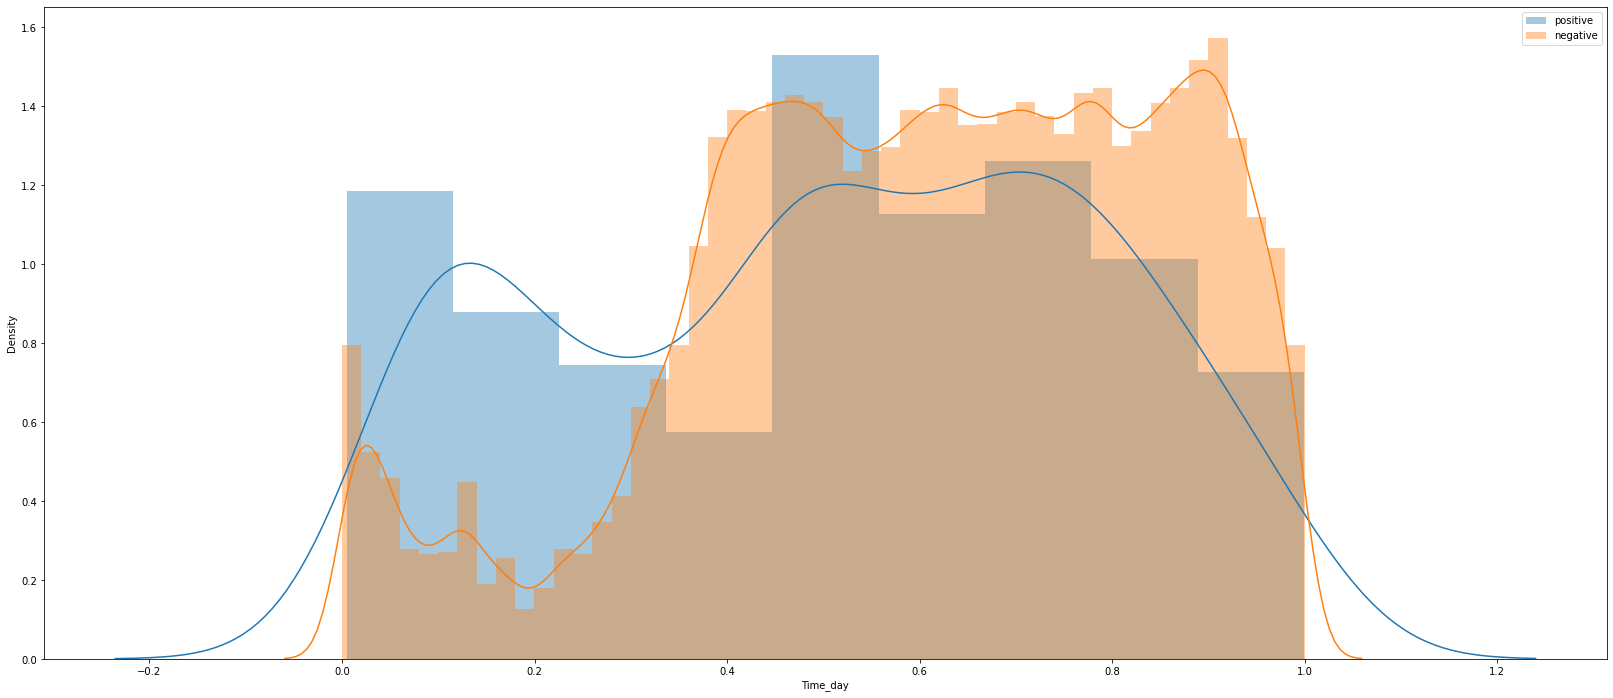

In [21]:
for col in df.columns:
    plt.figure(figsize=(28,12))
    sns.distplot(fraud_positive_df[col], label='positive')
    sns.distplot(fraud_negative_df[col], label='negative')
    plt.legend()

# 3.3 Features/features analysis

We could oberved a features/features corelation with:
- "Amount" => "V7,V20,V6"
- "Time" => "V22,V5,V1"

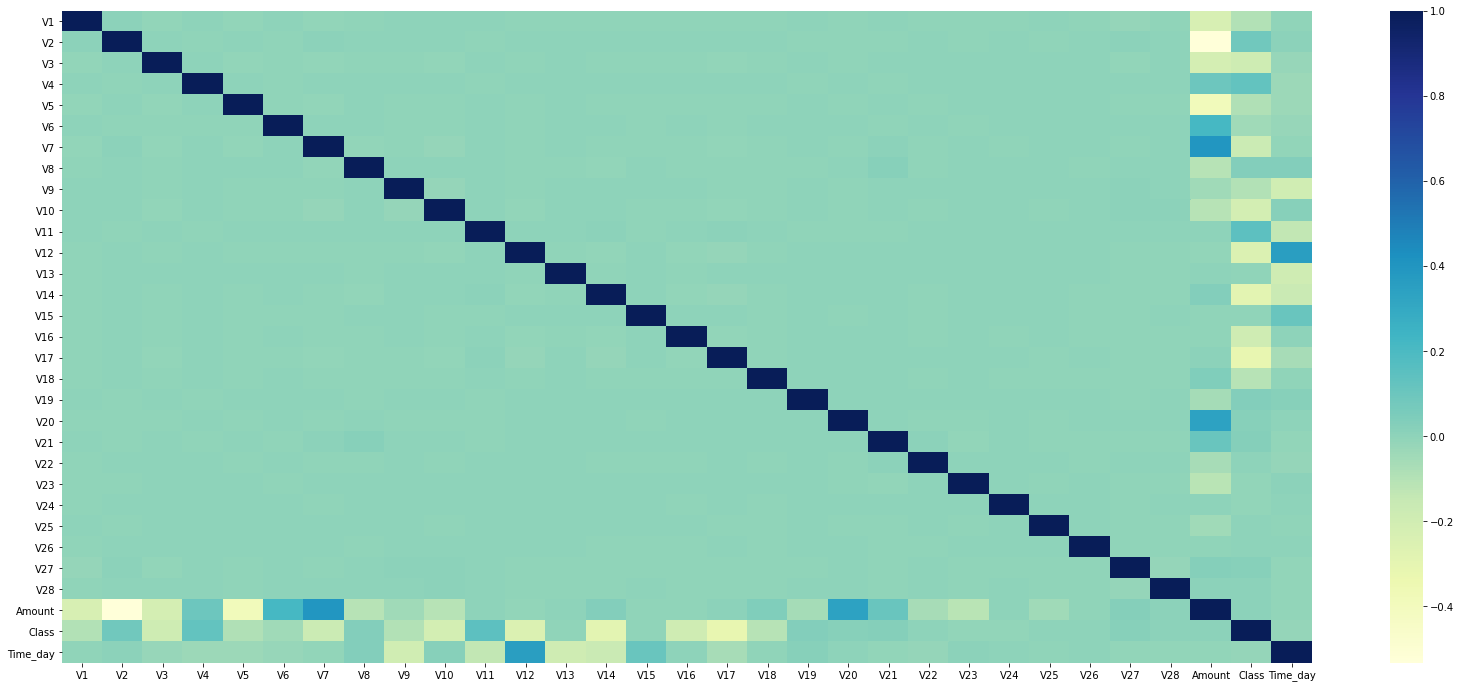

In [11]:
plt.figure(figsize=(28,12))
sns.heatmap(df.corr(),cmap="YlGnBu")

<Figure size 2016x864 with 0 Axes>

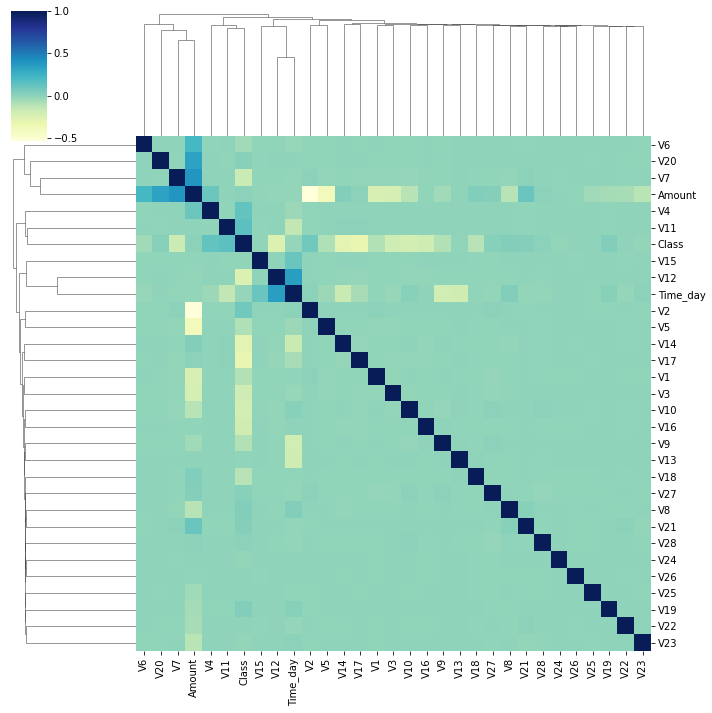

In [23]:
plt.figure(figsize=(28,12))
sns.clustermap(df.corr(),cmap="YlGnBu")

We could oberved a features/features corelation with:
- "Amount" => "V7,V20,V6"
- "Time" => "V12,V15"

As hightlighted in the previous features/features analysis and the following plots the corelation are not so strong and in the scatter plots it's quite hard to discriminate the abnormal bank transaction.

<Figure size 2016x864 with 0 Axes>

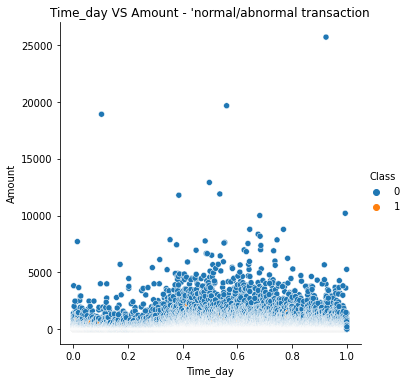

In [24]:
plt.figure(figsize=(28,12))
sns.relplot(x="Time_day",y="Amount",hue="Class", data=df)
plt.title("Time_day VS Amount - 'normal/abnormal transaction")
plt.show()

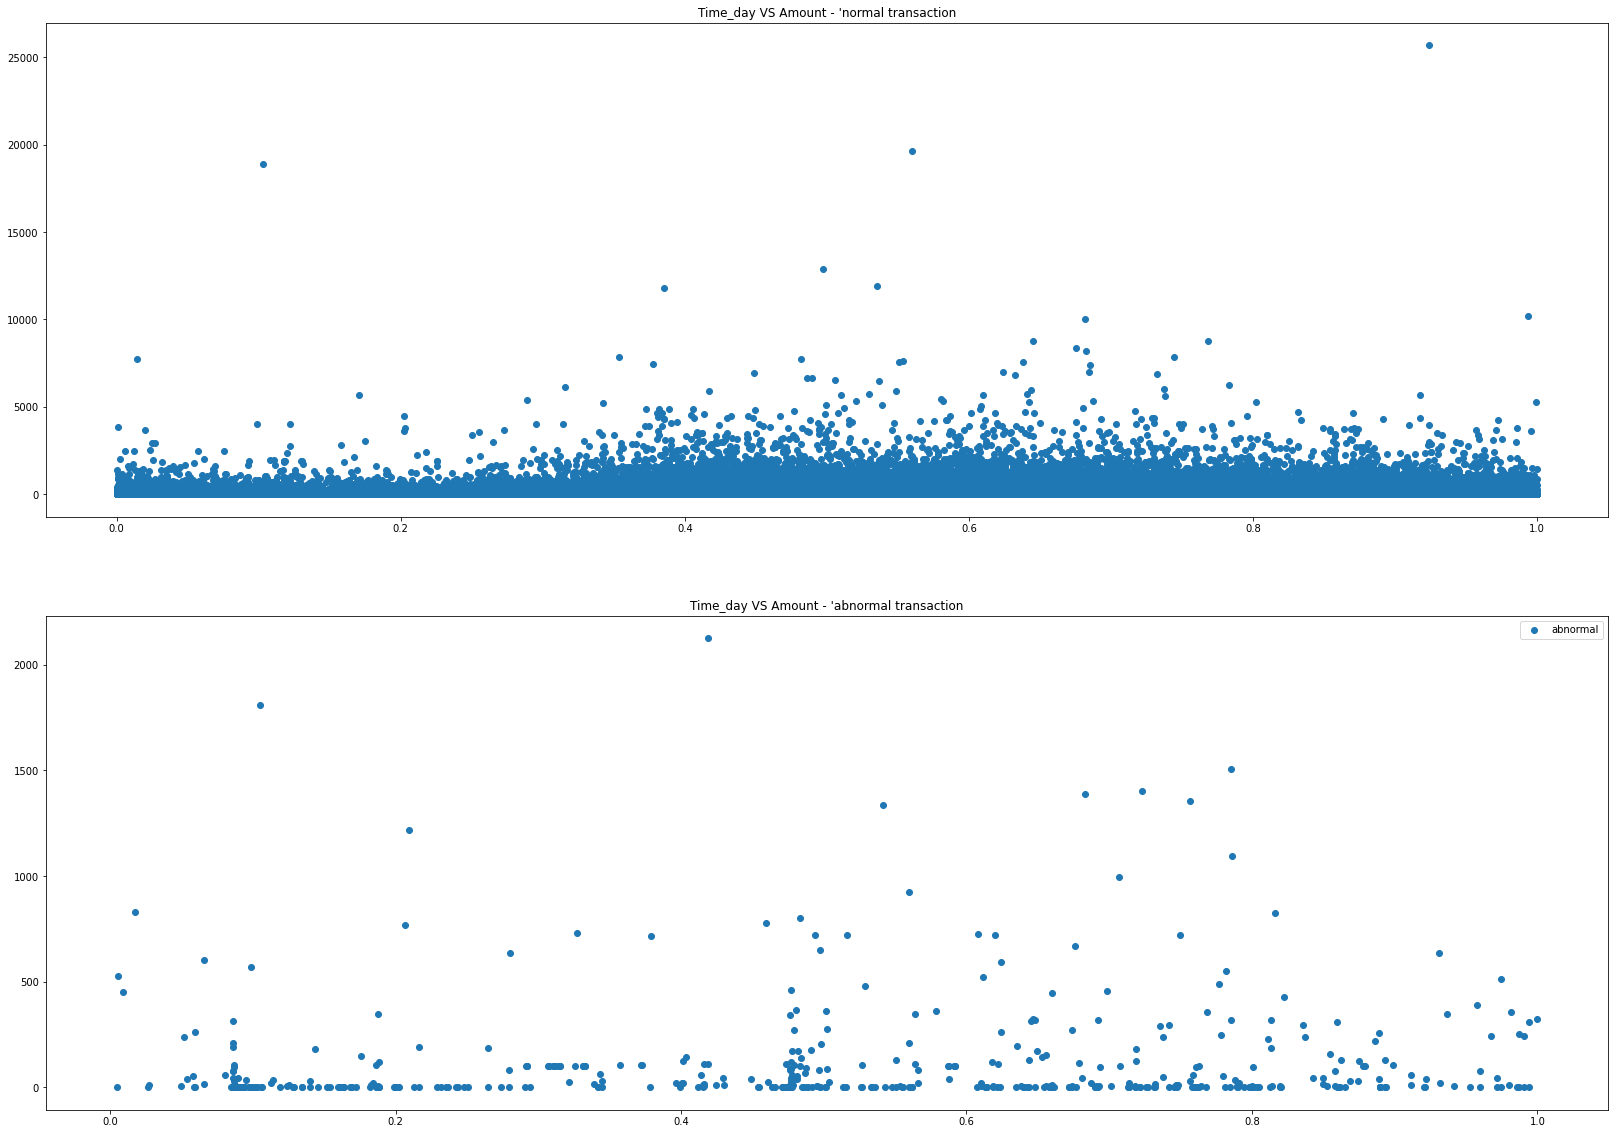

In [25]:

plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["Time_day"], fraud_negative_df["Amount"], label='normal')
plt.title("Time_day VS Amount - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["Time_day"], fraud_positive_df["Amount"], label='abnormal')
ax2=plt.title("Time_day VS Amount - 'abnormal transaction")

plt.legend()
plt.show()

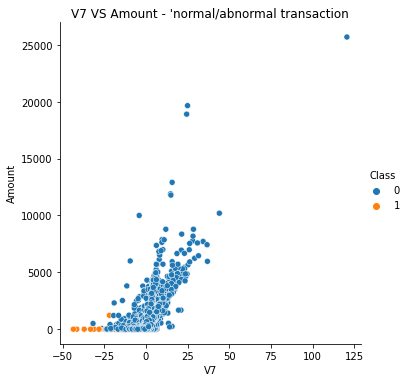

In [26]:
sns.relplot(x="V7",y="Amount",hue="Class", data=df)
plt.title("V7 VS Amount - 'normal/abnormal transaction")
plt.show()

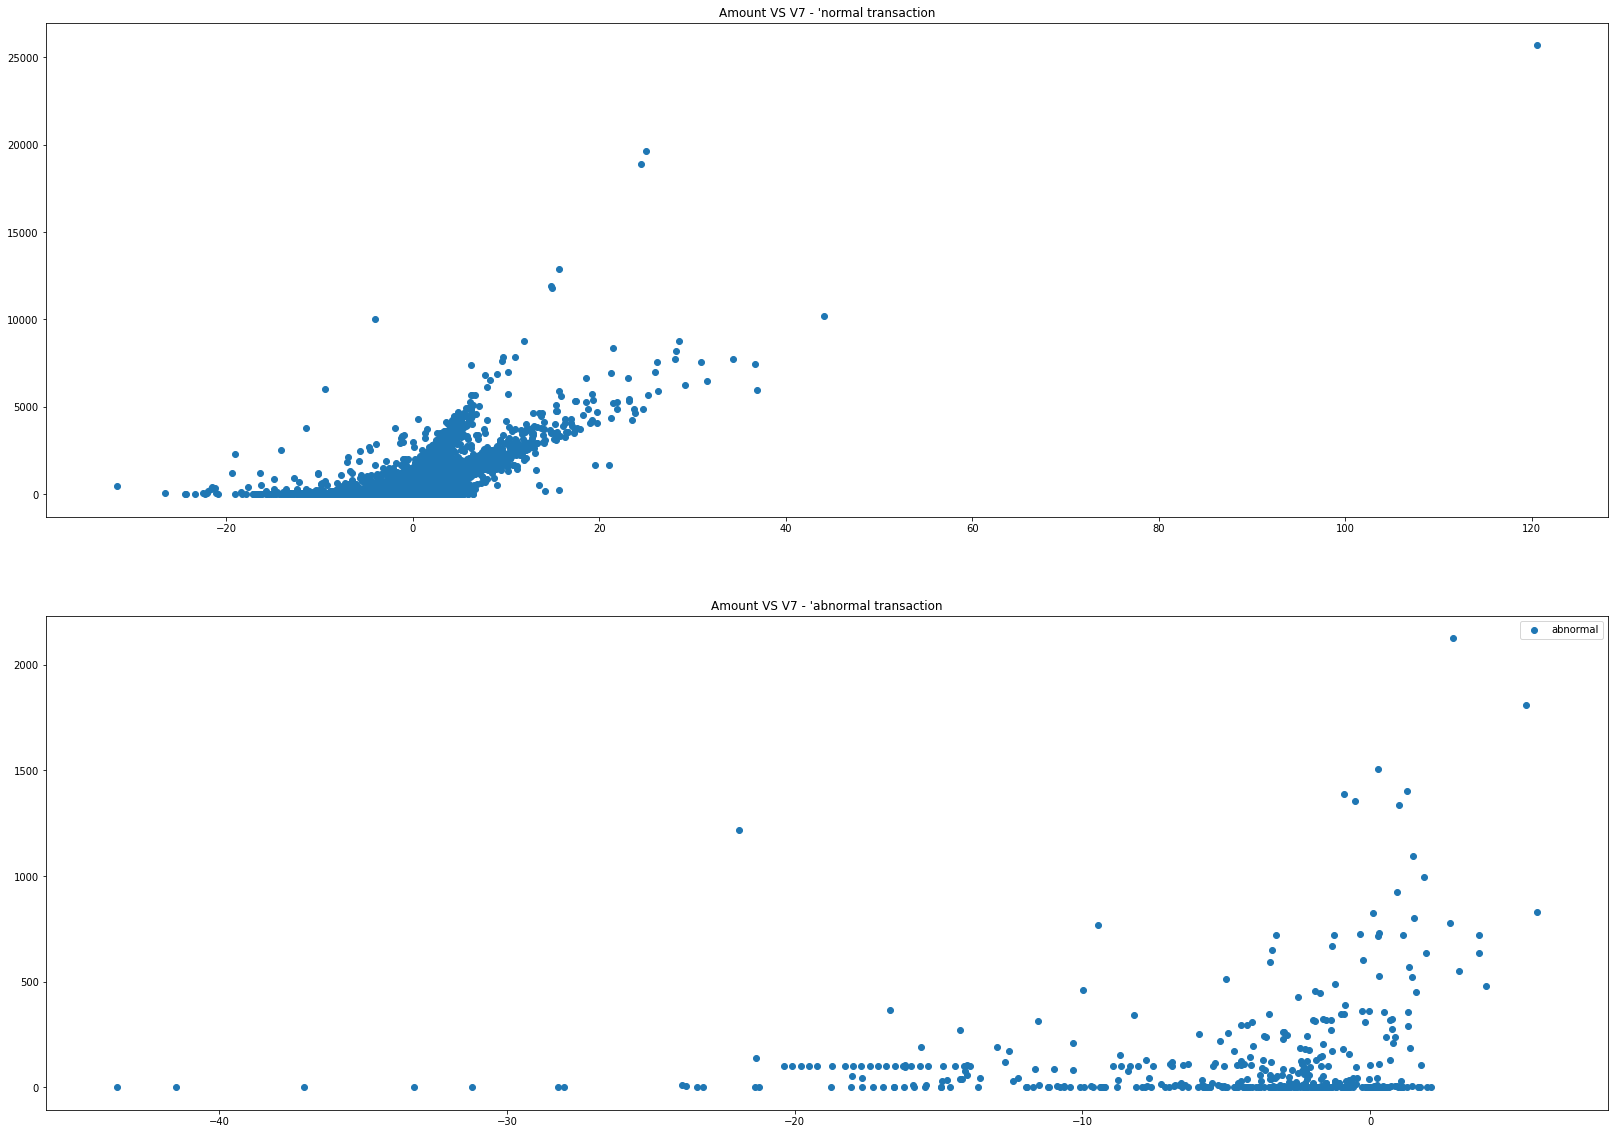

In [27]:

plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["V7"], fraud_negative_df["Amount"], label='normal')
plt.title("Amount VS V7 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["V7"], fraud_positive_df["Amount"], label='abnormal')
ax2=plt.title("Amount VS V7 - 'abnormal transaction")

plt.legend()
plt.show()

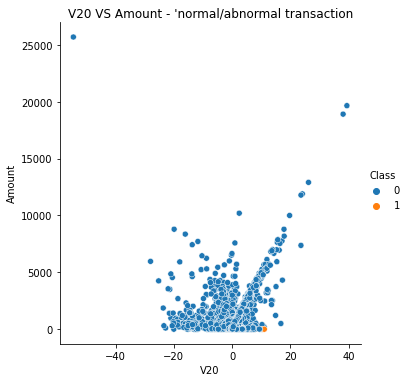

In [28]:
sns.relplot(x="V20",y="Amount",hue="Class", data=df)
plt.title("V20 VS Amount - 'normal/abnormal transaction")
plt.show()

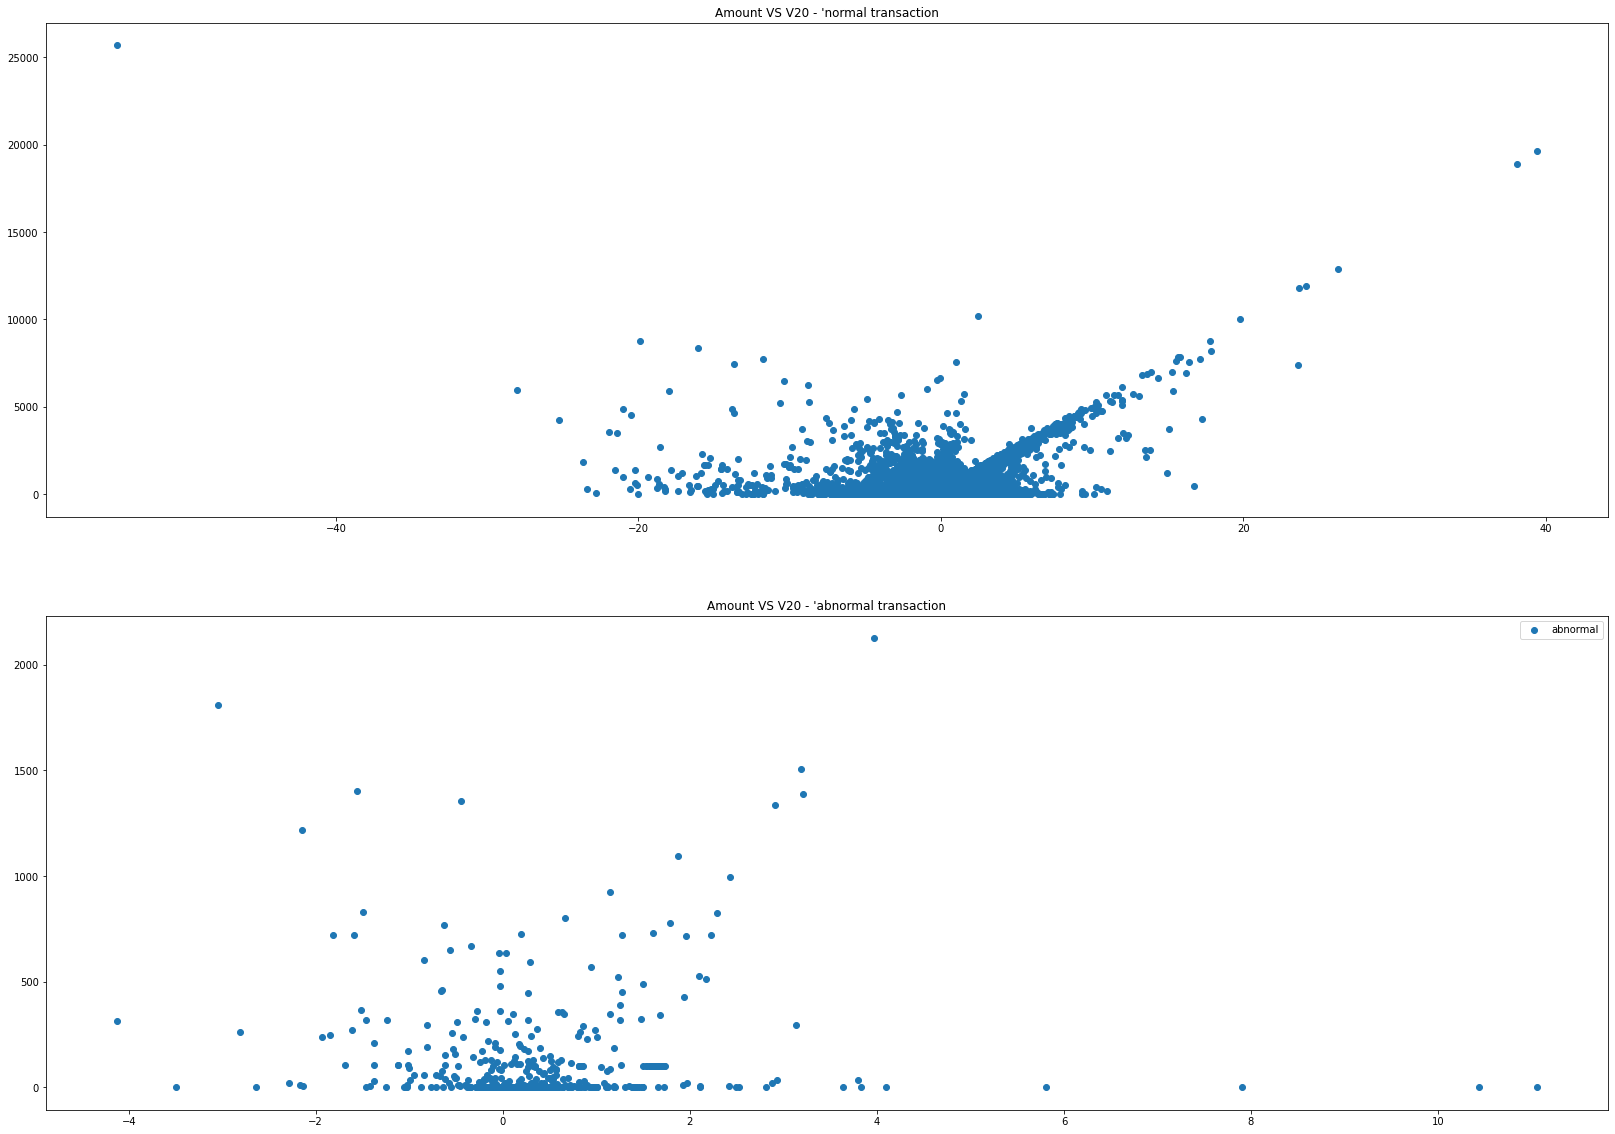

In [29]:
plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["V20"], fraud_negative_df["Amount"], label='normal')
plt.title("Amount VS V20 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["V20"], fraud_positive_df["Amount"], label='abnormal')
ax2=plt.title("Amount VS V20 - 'abnormal transaction")

plt.legend()
plt.show()

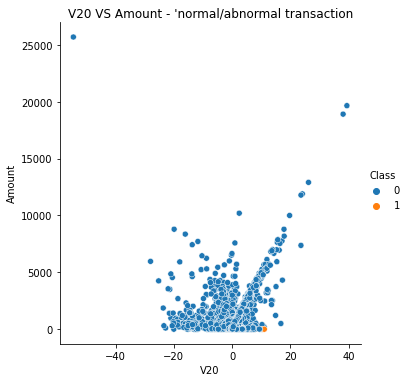

In [30]:
sns.relplot(x="V20",y="Amount",hue="Class", data=df)
plt.title("V20 VS Amount - 'normal/abnormal transaction")
plt.show()

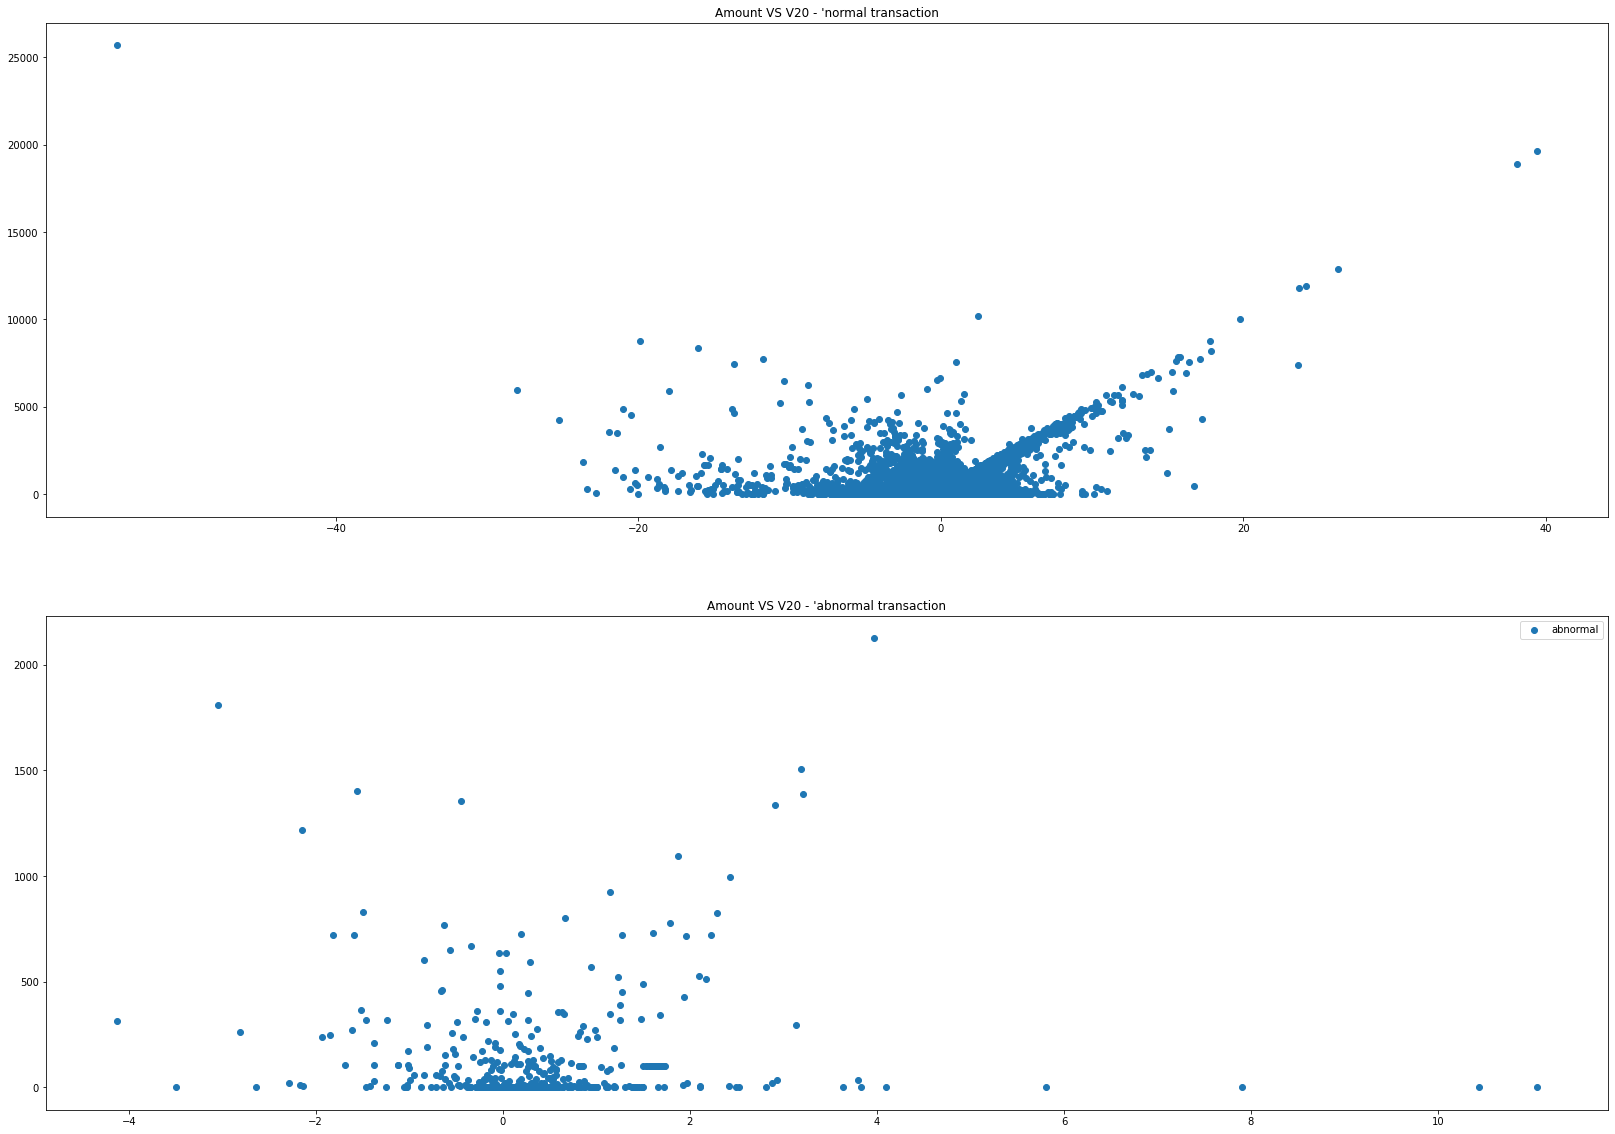

In [31]:
plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["V20"], fraud_negative_df["Amount"], label='normal')
plt.title("Amount VS V20 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["V20"], fraud_positive_df["Amount"], label='abnormal')
ax2=plt.title("Amount VS V20 - 'abnormal transaction")

plt.legend()
plt.show()

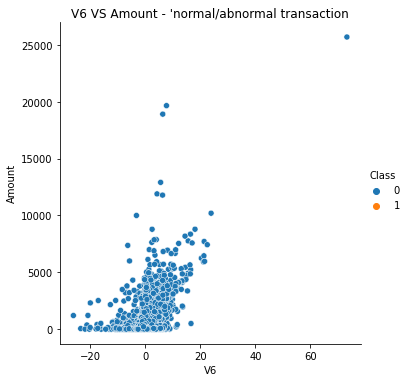

In [32]:
sns.relplot(x="V6",y="Amount",hue="Class", data=df)
plt.title("V6 VS Amount - 'normal/abnormal transaction")
plt.show()

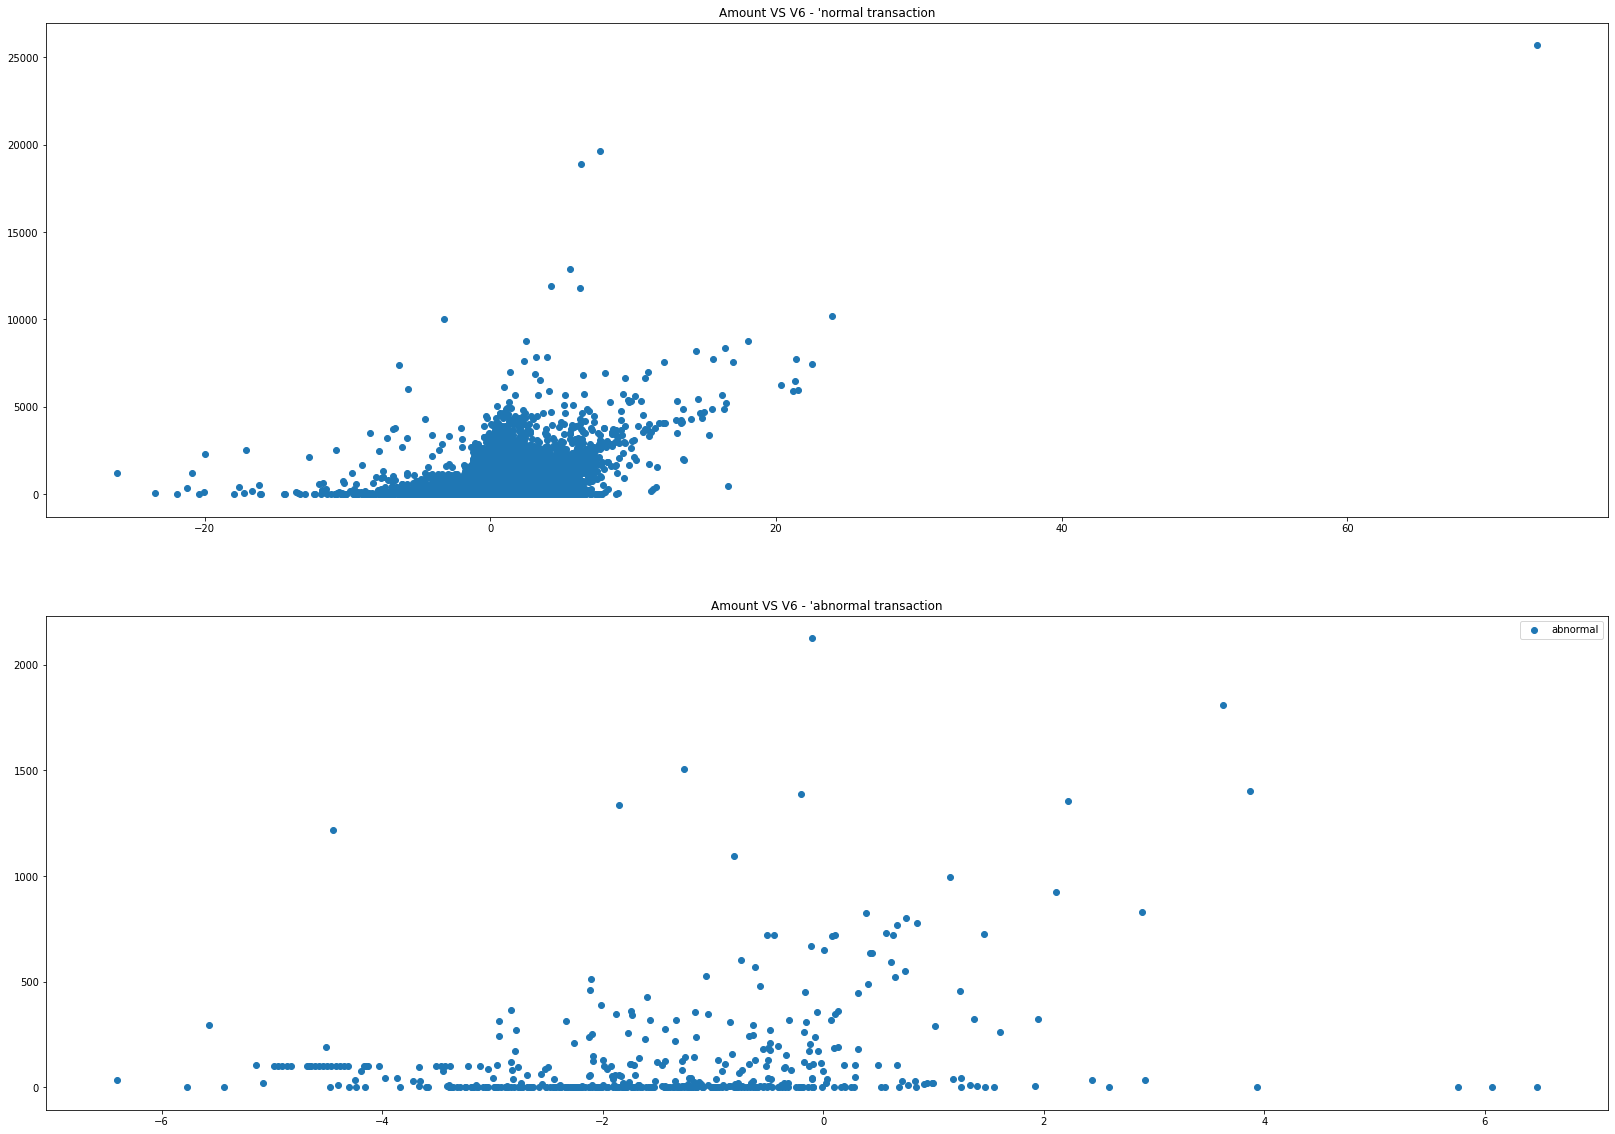

In [33]:
plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["V6"], fraud_negative_df["Amount"], label='normal')
plt.title("Amount VS V6 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["V6"], fraud_positive_df["Amount"], label='abnormal')
ax2=plt.title("Amount VS V6 - 'abnormal transaction")

plt.legend()
plt.show()

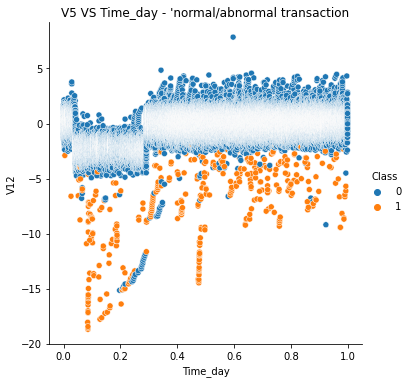

In [12]:
sns.relplot(x="Time_day",y="V12",hue="Class", data=df)
plt.title("V5 VS Time_day - 'normal/abnormal transaction")
plt.show()

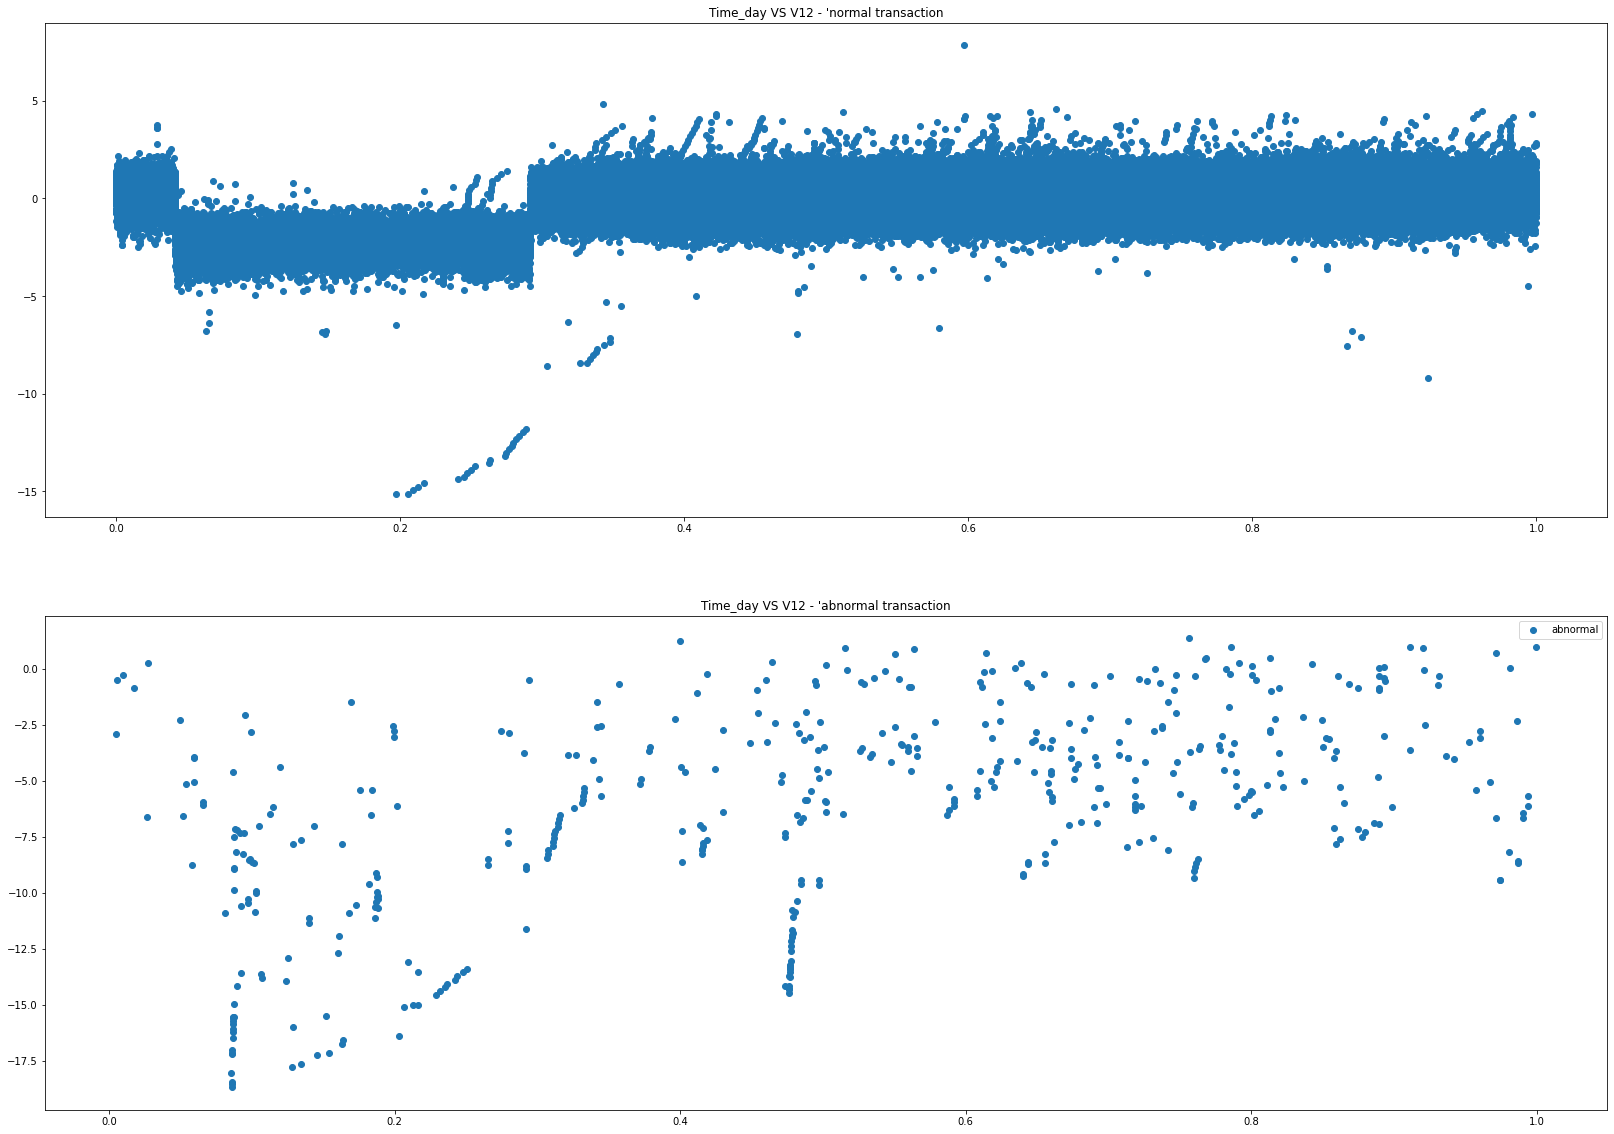

In [16]:
plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["Time_day"], fraud_negative_df["V12"], label='normal')
plt.title("Time_day VS V12 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["Time_day"], fraud_positive_df["V12"], label='abnormal')
ax2=plt.title("Time_day VS V12 - 'abnormal transaction")

plt.legend()
plt.show()

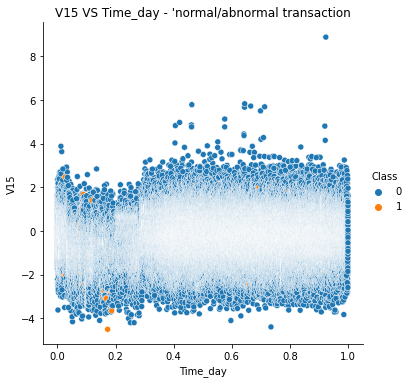

In [17]:
sns.relplot(x="Time_day",y="V15",hue="Class", data=df)
plt.title("V15 VS Time_day - 'normal/abnormal transaction")
plt.show()

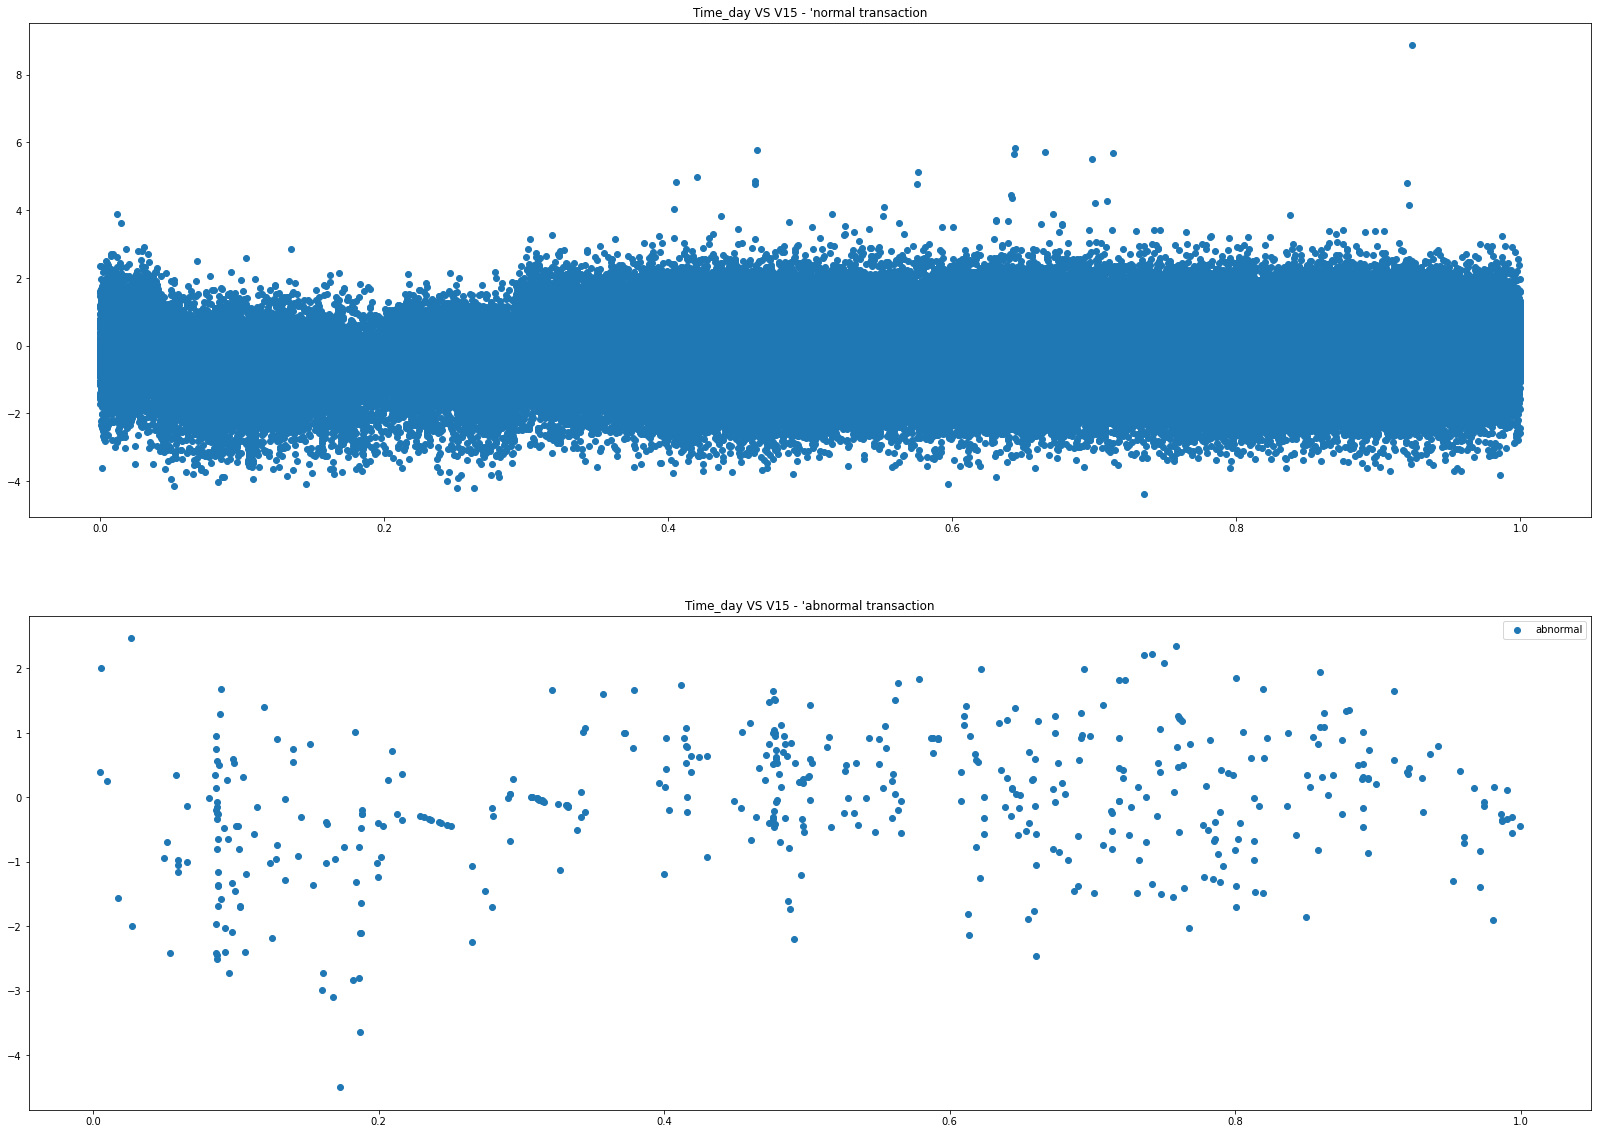

In [19]:
plt.figure(figsize=(28,20))

ax1=plt.subplot(211)
ax1=plt.scatter(fraud_negative_df["Time_day"], fraud_negative_df["V15"], label='normal')
plt.title("Time_day VS V15 - 'normal transaction")

plt.subplot(212)
ax2=plt.scatter(fraud_positive_df["Time_day"], fraud_positive_df["V15"], label='abnormal')
ax2=plt.title("Time_day VS V15 - 'abnormal transaction")

plt.legend()
plt.show()

#4.Pre-Processing

In [20]:
def feature_scaling (df):
  scaler = MinMaxScaler()
  y = df['Class']
  #y=y.to_frame()
  df=df.drop(columns=['Class','Time_day'],axis=1)
  #print(1)
  X = scaler.fit_transform(df)
  #print(2)
  X = pd.DataFrame(X, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], index=df.index)
  
  #print(3)
  
  #print(4)
  print(X.shape)
  print(y.shape)
  X.describe()
  return X,y

In [21]:
smote = SMOTE()

In [22]:

def smoting(X,y):
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    X, y =smote.fit_sample(X,y)
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    return X,y

In [23]:
def pre_processing (df):
    #print((df.isna().sum()/df.shape[0]).sort_values(ascending=True))
    X, y=feature_scaling (df)
    #print((X.isna().sum()/X.shape[0]).sort_values(ascending=True))
    X = pd.concat([X, df['Time_day']], axis=1)
    #print((X.isna().sum()/X.shape[0]).sort_values(ascending=True))
   
    print ('befor SMOTE:', Counter(y))
    X_smote, y_smote = smoting(X,y)
    print("\n --XXXX------------------ \n")
    print ('afetr SMOTE:', Counter(y_smote))
    print("X_smote.shape:",X_smote.shape,"y_smote.shape:",y_smote.shape)
    print("\n -------------------- \n")
    #print(pd.DataFrame(X).head())
    #print("\n -------------------- \n")
    #print(y.to_frame().head())
    return X_smote, y_smote

In [24]:
train,test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['Class'])

In [25]:
train.shape,test.shape

((226980, 31), (56746, 31))

In [26]:
X_train, y_train = pre_processing (train)

(226980, 29)
(226980,)
befor SMOTE: Counter({0: 226602, 1: 378})
X.shape: (226980, 30) y.shape: (226980,)

 -------------------- 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


X.shape: (453204, 30) y.shape: (453204,)

 -------------------- 


 --XXXX------------------ 

afetr SMOTE: Counter({0: 226602, 1: 226602})
X_smote.shape: (453204, 30) y_smote.shape: (453204,)

 -------------------- 



In [27]:
X_test, y_test = pre_processing (test)

(56746, 29)
(56746,)
befor SMOTE: Counter({0: 56651, 1: 95})
X.shape: (56746, 30) y.shape: (56746,)

 -------------------- 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


X.shape: (113302, 30) y.shape: (113302,)

 -------------------- 


 --XXXX------------------ 

afetr SMOTE: Counter({0: 56651, 1: 56651})
X_smote.shape: (113302, 30) y_smote.shape: (113302,)

 -------------------- 



#5.ML Modeling

In [28]:
y = df['Class'].values

X=df.drop(['Class'],axis=1).values


In [29]:
def tsne(X, y):
  tsne = TSNE(n_components=2, random_state=0)
  X_tsne = tsne.fit_transform(X)

  plt.figure(figsize=(12, 8))
  plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], marker='o', color='g', linewidth='1', alpha=0.8, label='normal')
  plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], marker='o', color='r', linewidth='1', alpha=0.8, label='abnormal')

  plt.legend(loc='best')
  
  plt.show()

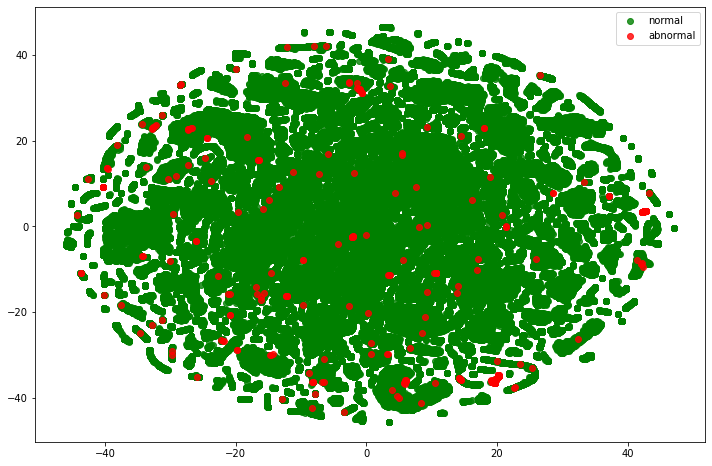

In [48]:
tsne(X, y)

- filltering X_train normal transaction only

In [30]:
X_train_pure = X_train[y_train==0]
X_train_pure.shape

(226602, 30)

- Autoencoder model

In [31]:

latent_dim = 100

# define the input layer: the pixel values
input_data = Input(shape=(X_train.shape[1]))

# encode
encoded = Dense(latent_dim, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_data)
encoded = Dense(latent_dim/2, activation='relu')(encoded)

# decode
decoded = Dense(latent_dim, activation='tanh')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_data, decoded)

# Define the encoder model
encoder = Model(input_data, encoded)

- fitting X_train pure (normal transaction only) the autoencoder model

Epoch 1/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0507 - val_loss: 0.0462
Epoch 2/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0462 - val_loss: 0.0436
Epoch 3/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0421 - val_loss: 0.0412
Epoch 4/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0385 - val_loss: 0.0390
Epoch 5/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0351 - val_loss: 0.0370
Epoch 6/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0320 - val_loss: 0.0351
Epoch 7/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0290 - val_loss: 0.0333
Epoch 8/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0262 - val_loss: 0.0317
Epoch 9/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0235 - val_loss: 0.0303
Epoch 10/100
886/886 [==============================] - 2s 3ms/step - loss: 0.0211 - val_lo

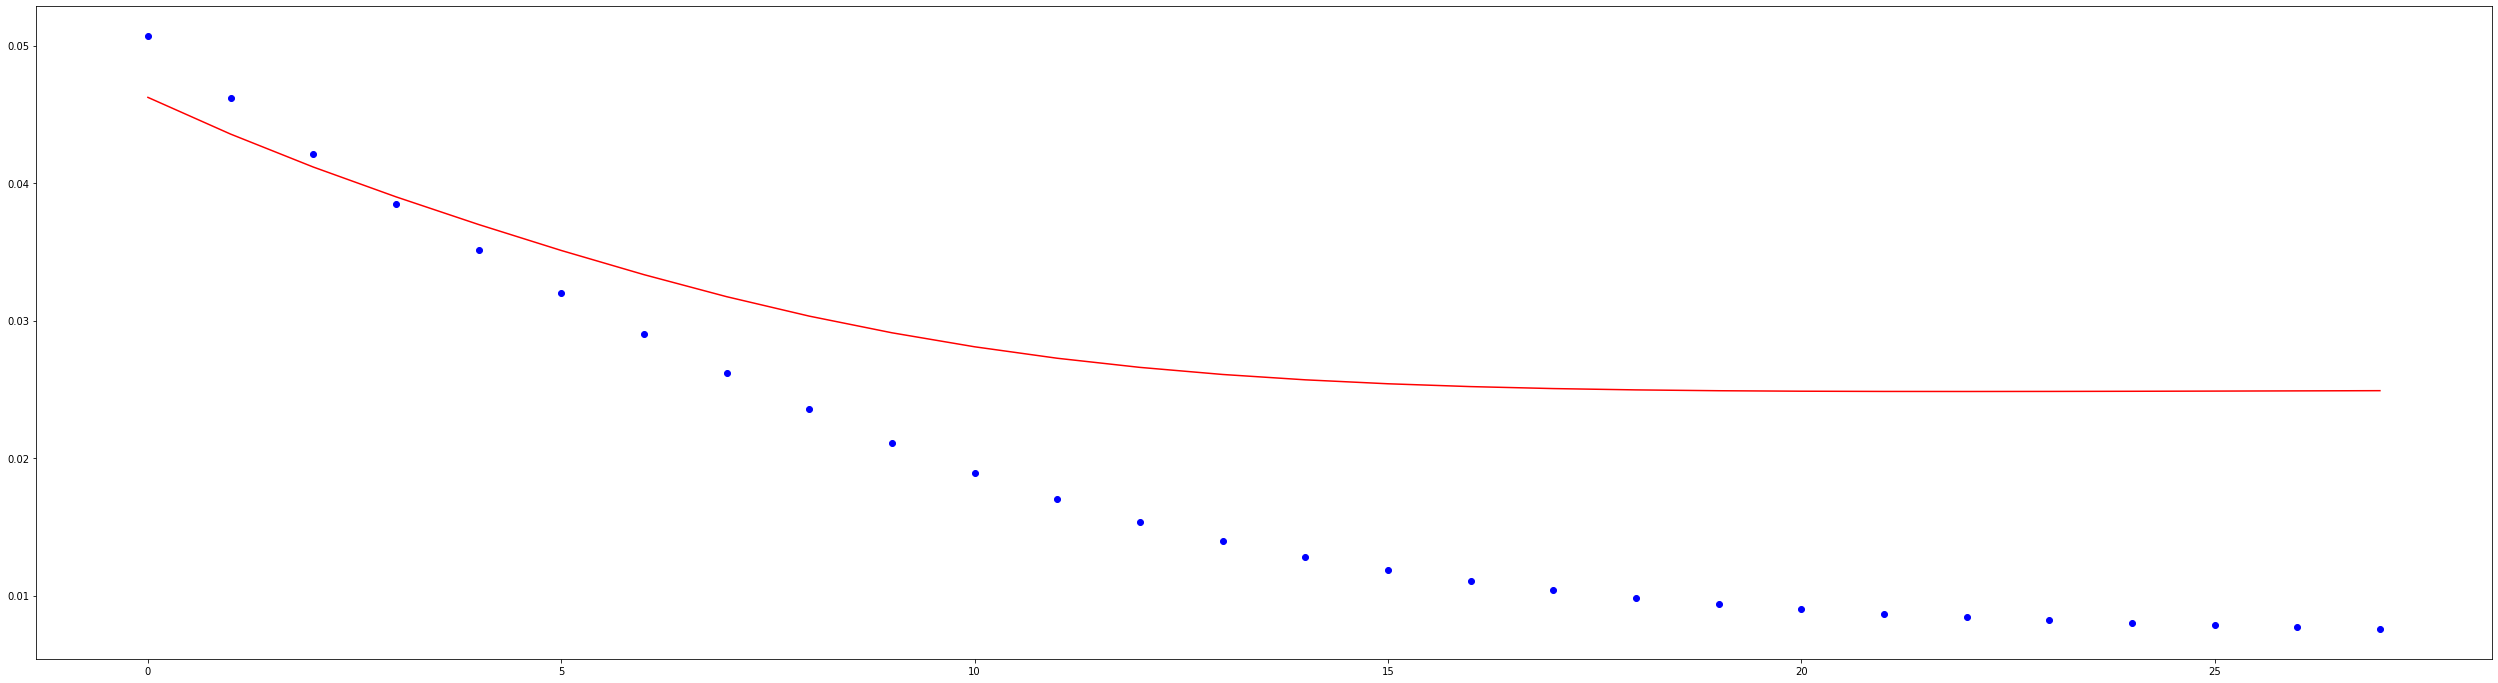

In [32]:

callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]
autoencoder.compile(optimizer="adadelta", loss='mse')

batch_size = 256

history=autoencoder.fit(X_train_pure, X_train_pure,
                epochs=100,
                batch_size=batch_size,
                shuffle= True,
                validation_data=(X_test, X_test),
                callbacks=callbacks)

history_dict=history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
plt.figure(figsize=(44,12))
plt.plot(loss_values, 'bo', label='train loss')
plt.plot(val_loss_values, 'r', label='validation train loss')

- predict the original X_train (normal + abnormal transaction) the autoencoder model

In [33]:
X_train_pred = autoencoder.predict(X_train)

- computation of Mean Square Error on normal and abnormal transaction

In [34]:
mse_c0 = [mean_squared_error(X_train[y_train==0, i], X_train_pred[y_train==0, i]) for i in range(X_train.shape[1])]
mse_c1 = [mean_squared_error(X_train[y_train==1, i], X_train_pred[y_train==1, i]) for i in range(X_train.shape[1])]

As the concept of anomaly detedtion, we can observe the abnormal outlier's mean square error plots

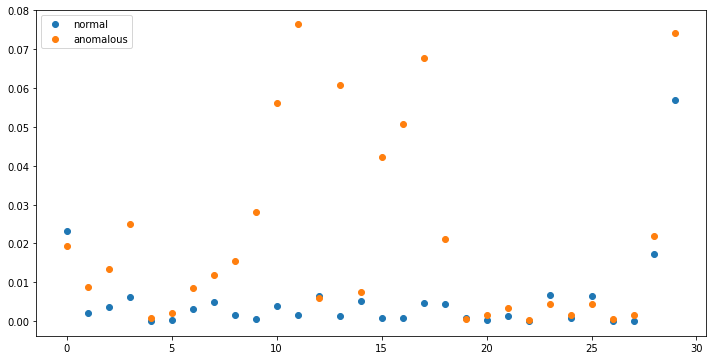

In [35]:
plt.figure(figsize=(12, 6))

plt.scatter(range(len(mse_c0)), mse_c0,label='normal')
plt.scatter(range(len(mse_c1)), mse_c1, label='anomalous')
plt.legend()
plt.show()

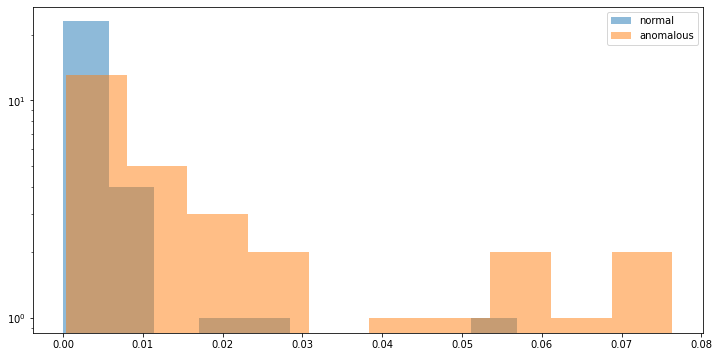

In [36]:
plt.figure(figsize=(12, 6))
plt.hist(mse_c0, log=True, alpha=0.5,label='normal')
plt.hist(mse_c1, log=True, alpha=0.5, label='anomalous')
plt.legend()
plt.show()

- ROC curve

In [37]:
X_test_pred = autoencoder.predict(X_test)
test_error = np.array([mean_squared_error(gt, pred) for gt,pred in zip(X_test, X_test_pred)])

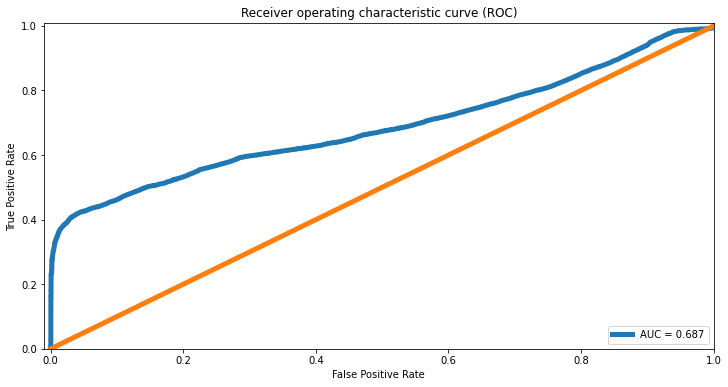

In [38]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, test_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.figure(figsize=(12, 6))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- Our model have good preformance ROC metiric , espesialy for anomaly detection and unsupervised approch   

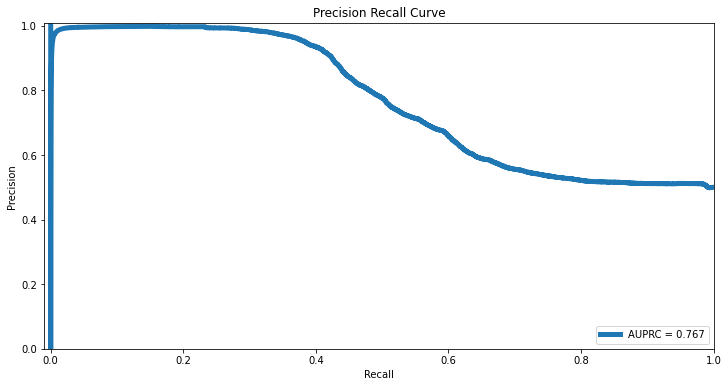

In [39]:
precision , recall, threshold = precision_recall_curve(y_test, test_error)
auprc = auc(recall, precision)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, linewidth=5, label='AUPRC = %0.3f'% auprc)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

- Our model have good preformance AUPRC metiric , espesialy for anomaly detection and unsupervised approch 